# RETENCION CLIENTES EMPRESA DE TELEFONIA

# Abstract: 

En la industria de las Telecomunicaciones, los clientes buscan soluciones en el ámbito de comunicaciones e internet, recurriendo a un mercado donde diversas empresas compiten por ofrecer servicios que no solo se centran en la captación inicial del cliente, sino también en la tarea crucial de retenerlo a lo largo del tiempo.
La renuncia de clientes, comúnmente conocida como "churn", representa un desafío crítico que las empresas de telecomunicaciones enfrentan en la actualidad. 
La pérdida de clientes puede tener un impacto significativo en los ingresos y la rentabilidad de una empresa. Por ende, comprender los factores que contribuyen a la renuncia de clientes resulta esencial para la supervivencia en un entorno 
sumamente competitivo, como es el de las telecomunicaciones.
Por lo tanto, basándose en los conocimientos adquiridos a través del análisis de la renuncia de clientes, las empresas pueden desarrollar estrategias, dirigirse a segmentos específicos, mejorar la calidad de los servicios ofrecidos para optimizar la experiencia del cliente, cultivando así la confianza con los clientes. Es por eso que la construcción de modelos predictivos y la elaboración de informes sobre el análisis de la renuncia de clientes se convierten en elementos clave que allanan el camino para el crecimiento.

 
# Contexto Comercial

El objetivo general es proporcionar una solución completa de inteligencia de clientes, 
que ayude a una empresa a anticipar y reducir la pérdida de clientes, conocer la siguiente 
mejor oferta y mejorar la experiencia para el cliente a través de múltiples canales. 

# Problema Comercial

El objetivo principal de este análisis es proporcionar insights valiosos que ayuden a la empresa a retener a sus
clientes y reducir la tasa de Renuncia.
Intentaremos  responder a algunas preguntas :
- ¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones?
- ¿Cuál es la distribución de la edad de los clientes?
- ¿Cómo se distribuyen los servicios contratados entre los clientes?
- ¿Cuál es la distribución de los cargos mensuales y totales de los clientes?
- ¿Existe una relación entre la duración del contrato y la tasa de renuncia?
- ¿Cómo se relaciona la edad con la probabilidad de renuncia?
- ¿Los cargos mensuales varían según el tipo de servicio contratado?
- ¿Las revisiones de satisfacción están relacionadas con los servicios contratados?
- ¿Cómo interactúan la duración del contrato, los cargos mensuales y la satisfacción del cliente para influir en la renuncia?
- ¿Existen segmentos de clientes específicos con patrones de renuncia particulares basados en múltiples variables?
- ¿Cuál es la combinación óptima de servicios contratados que se asocia con la menor tasa de renuncia?

#  Hipótesis General:

"La tasa de renuncia de clientes en la empresa de telecomunicaciones está influenciada por una combinación de factores demográficos, patrones de consumo de servicios y niveles de satisfacción del cliente. A través del análisis de datos, buscamos identificar las variables clave que tienen un impacto significativo en la tasa de renuncia y proporcionar recomendaciones para reducir la renuncia de clientes y mejorar la retención."

# Contexto Analítico :


Para poder llevar a cabo nuestra tarea  contamos con un archivo de datos provistas por la empresa del último mes que contiene 7043 filas (clientes) y 21 columnas (features / características). La columna "Churn" es nuestro variable target. Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre: Clientes que se fueron en el último mes. Columna Churn (Renuncia) Servicios a los que se ha suscrito cada cliente: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales. Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes.

ATRIBUTOS:

customerID: Customer ID

gender : Si el cliente es hombre o mujer.

SeniorCitizen : Si el cliente es persona mayor o no (1, 0)

Partner: Si el cliente tiene pareja o no (Sí, No)

Dependents: Si el cliente tiene dependientes o no (Sí, No)

Tenure : (Tenencia) Número de meses que el cliente ha permanecido en la empresa.

PhoneService :Si el cliente tiene servicio telefónico o no (Sí, No)

MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)

InternetService : Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)

OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, No servicio de internet)

OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, No hay servicio de Internet)

DeviceProtection: Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, No servicio de internet)

StreamingTV: Si el cliente tiene streaming de TV o no (Sí, No, No servicio de internet)

StreamingMovies: Si el cliente tiene streaming de películas o no (Sí, No, No servicio de internet)

Contract: El plazo del contrato del cliente (mes a mes, un año, dos años)

PaperlessBilling: Si el cliente dispone de facturación electrónica o no (Sí, No)

PaymentMethod: El método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

MonthlyCharges:El importe cobrado a la cliente mensualmente.

TotalCharges: El importe total cargado a la cliente.

Churn: Si la cliente Canceló su suscripción o no (Sí o No)
Comenzaremos a responder las preguntas realizadas anteriormente:



In [1]:
#Importamos  Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Libreria para trabajar cadenas de texto
import re
# Librería para transformar etiquetas de texto (categóricas) en números. 
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics




In [2]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/PR0Y3CT0_C0D3RH0US3/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df=  pd.read_csv(url,sep=",")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Verificamos que Tipos de Datos son:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
#La columna de Senior Citizen, la transformamos en SI o NO 
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [6]:
# Verificamos primeros datos estadísticos que encontramos en el dataset
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [7]:
# Verificamos la columna Modificada
print(df['SeniorCitizen'])

0       No
1       No
2       No
3       No
4       No
        ..
7038    No
7039    No
7040    No
7041    Si
7042    No
Name: SeniorCitizen, Length: 7043, dtype: object


In [8]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [9]:
# Analizamos características del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
#Busco valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Llenar los valores faltantes en TotalCharges con MonthlyCharges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [13]:
#Chequeo nuevamente si existen valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Me fijo las categorias dentro de cada columna para ver si hay algún error.
for columna in df:
  print(columna, df[columna].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen ['No' 'Si']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit c

# Exploratory Data Engeneering(EDA):

In [15]:
# ¿Cuál es la tasa actual de renuncia de clientes en la empresa de telecomunicaciones (ESTA SERA NUESTRA VARIABLE TARGET)?
clientes_renunciados = df[df['Churn'] == "Yes"].shape[0]
total_clientes = df.shape[0]
print(f"Cantidad de Clientes Activos en el mes {total_clientes}")
print(f"Cantidad de clientes que renunciaron: {clientes_renunciados}")
tasa_renuncia = (clientes_renunciados / total_clientes) * 100
print(f"Tasa de renuncia del mes {round(tasa_renuncia,1)} % ")

Cantidad de Clientes Activos en el mes 7043
Cantidad de clientes que renunciaron: 1869
Tasa de renuncia del mes 26.5 % 


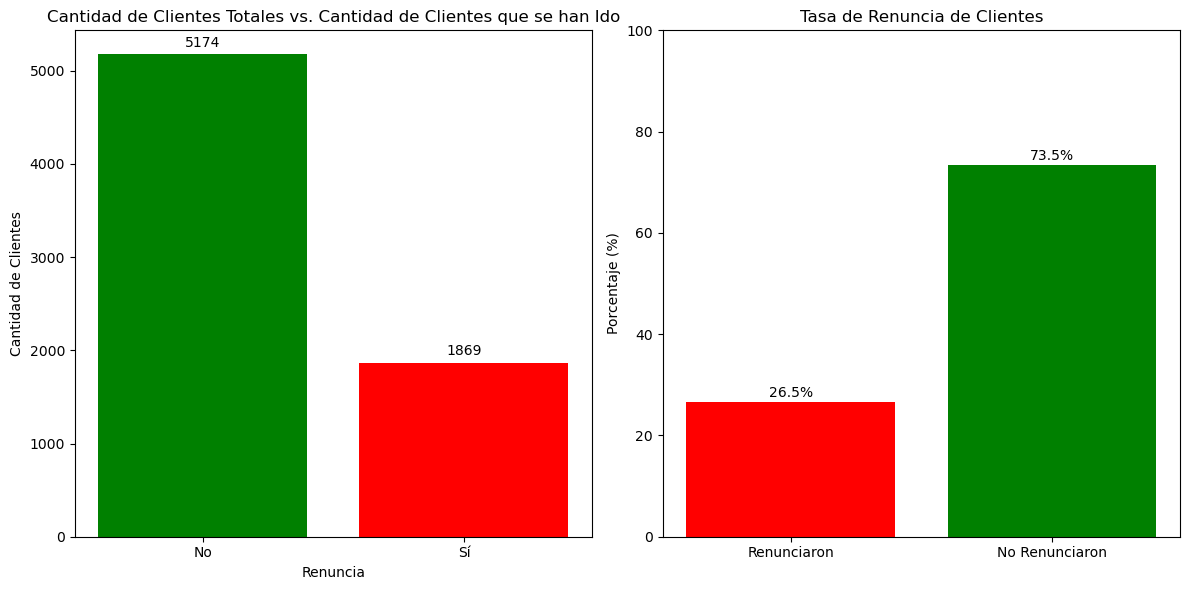

In [16]:
# Empezamos a visualizar la información de nuestro interés.
# Creamos  el primer gráfico de barras (Clientes Totales vs. Churn (RENUNCIAS))
plt.figure(figsize=(12, 6))

# Subplot 1: Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido
plt.subplot(1, 2, 1)
churn_counts = df['Churn'].value_counts()
bars = plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xlabel('Renuncia')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(churn_counts.index, ['No', 'Sí'])

# Subplot 2: Tasa de Renuncia de Clientes
plt.subplot(1, 2, 2)
tasa_renuncia = (clientes_renunciados / total_clientes)*100

etiquetas = ['Renunciaron', 'No Renunciaron']
porcentajes = [tasa_renuncia, 100 - tasa_renuncia]
colores = ['red', 'GREEN']

plt.bar(etiquetas, porcentajes, color=colores)
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, porcentaje + 1, f'{porcentaje:.1f}%', ha='center')

plt.title('Tasa de Renuncia de Clientes')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

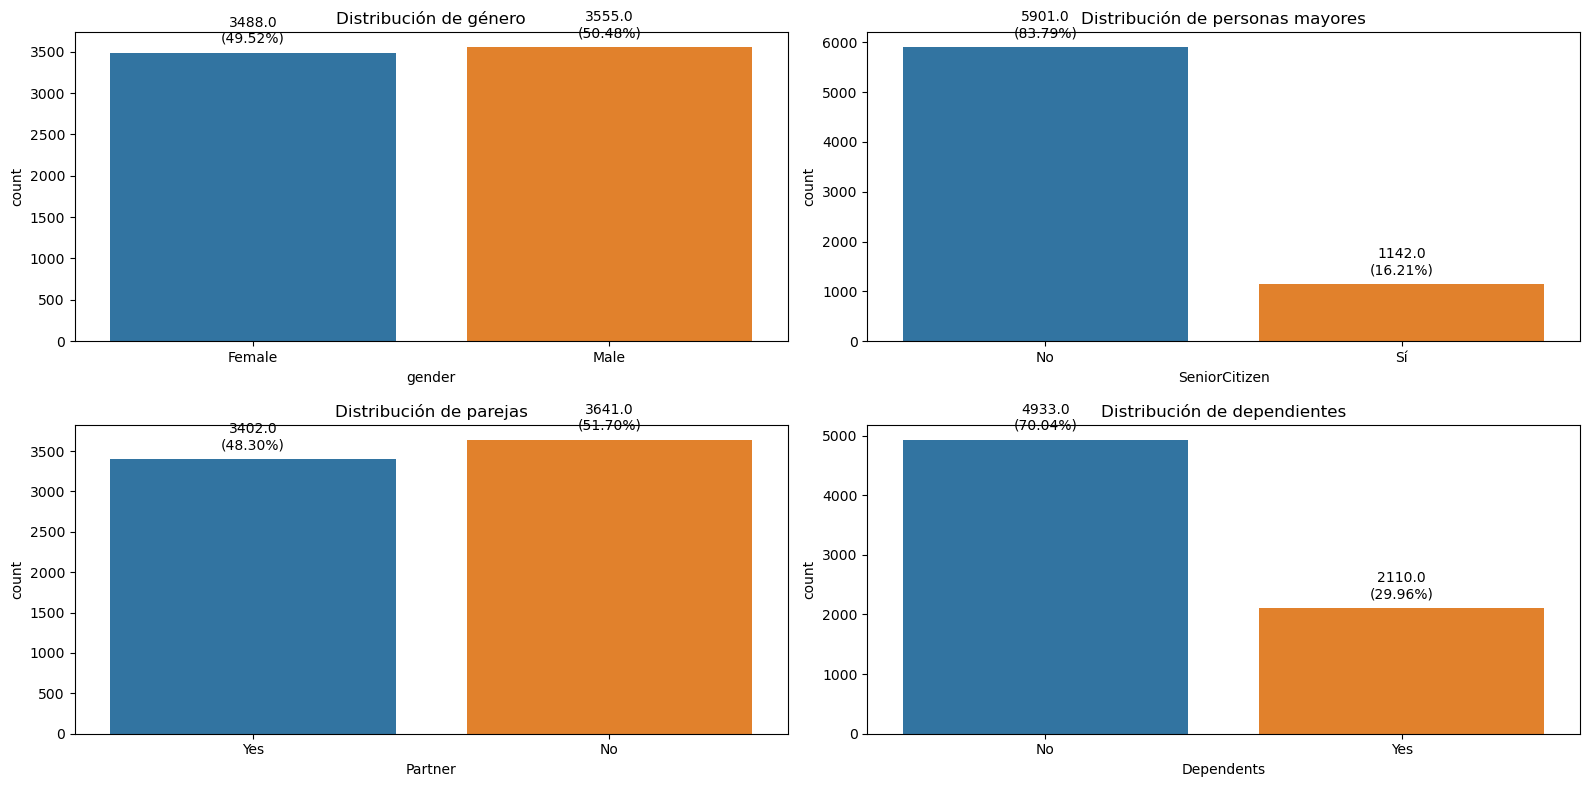

In [17]:
#  Verificamos como se distribuyen los principales atributos


# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Gráfico de barras para "gender"
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género")

# Gráfico de barras para "SeniorCitizen"
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Gráfico de barras para "Partner"
sns.countplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas")

# Gráfico de barras para "Dependents"
sns.countplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()


# Por atributo principal verificamos: 
- 1- En el caso de Sexo, Existen una paridad de Clientes de ambos sexos.
- 2- Existe un 16% de Clientes Pasivos del Total de Clientes.
- 3- El 48% del total tienen pareja.
- 4 -El 70% de Clientes no tienen grupo familiar.

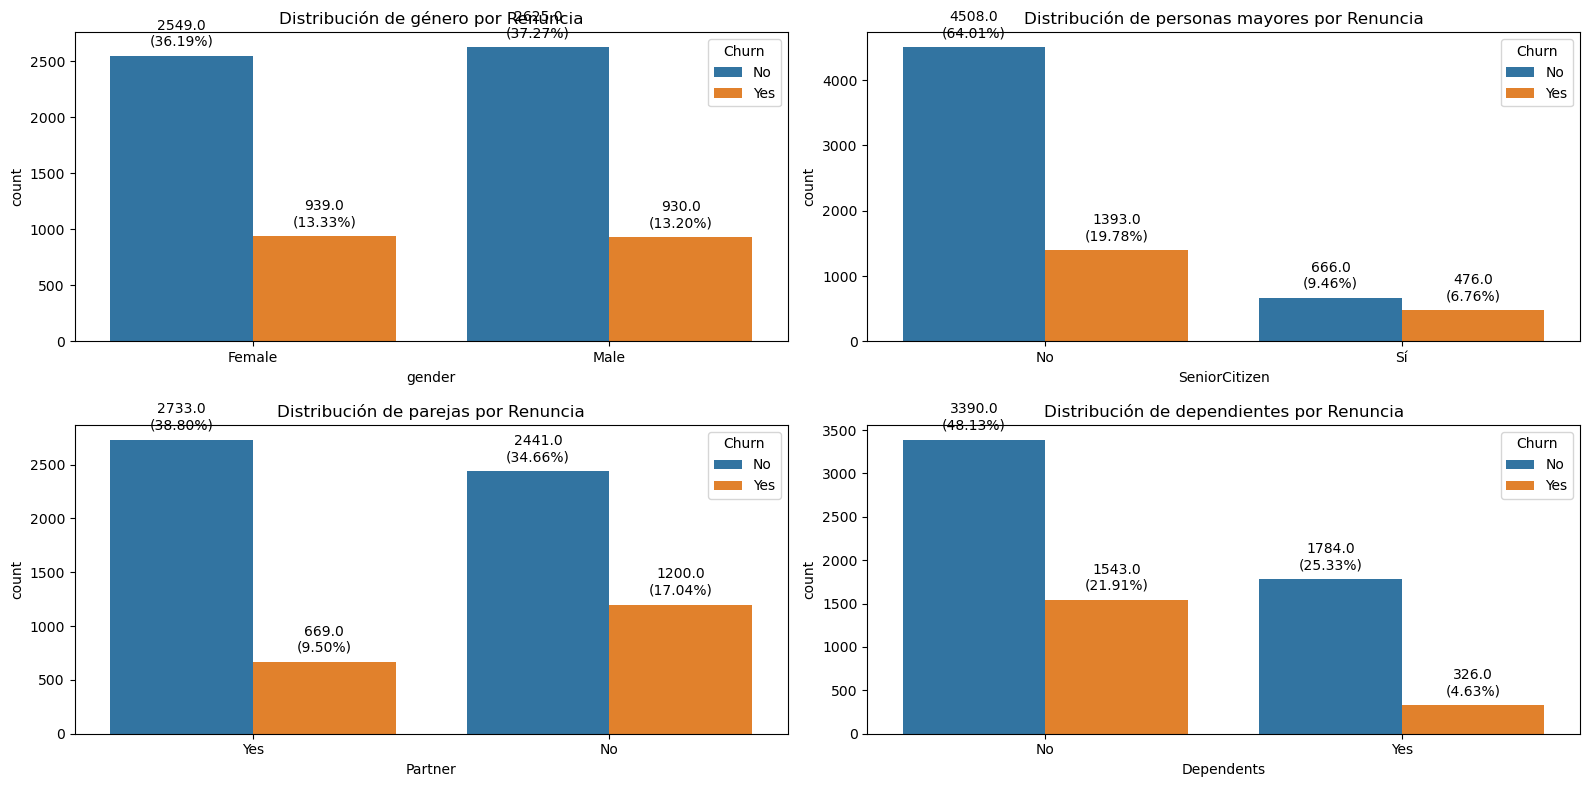

In [18]:
# RELACIONO ESTOS ATRIBUTOS CON LA VARIABLE TARGET CHURN (RENUNCIA)


# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Crear gráficos de barras apilados para "gender" en función de "Churn"
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género por Renuncia")

# Crear gráficos de barras apilados para "SeniorCitizen" en función de "Churn"
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores por Renuncia")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Crear gráficos de barras apilados para "Partner" en función de "Churn"
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas por Renuncia")

# Crear gráficos de barras apilados para "Dependents" en función de "Churn"
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes por Renuncia")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()

# **INSIGHTS**: 
- 1- En el caso de Sexo, no se ve un comportamiento determinante por sexo ( Cantidad de renunicias son similares).
- 2- Cuando realiza,por Activos se verifica mayor renuncia que los pasivos
- 3- Los que NO tienen pareja son los que en este mes mas renuncian 
- 4 - Los que no tienen grupo familiar  son los que mayor renuncian

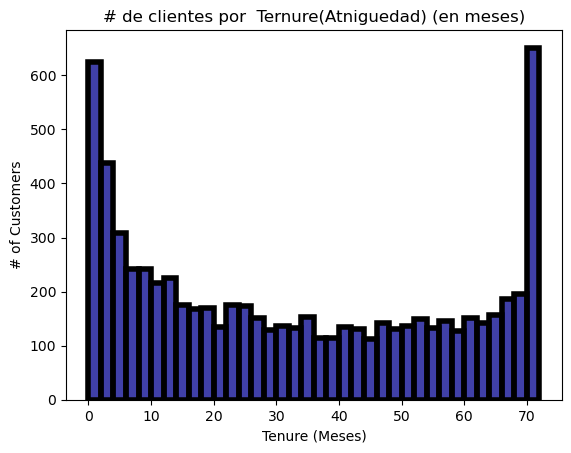

In [19]:
# Creamos un Histograma utilizando Seaborn para verificar la distribución de la variable TERNURE (ANTIGUEDAD).
ax = sns.histplot(df['tenure'], bins=int(180/5), color='darkblue',
                  edgecolor='black', kde=False, linewidth=4)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (Meses)')
ax.set_title('# de clientes por  Ternure(Atniguedad) (en meses)')

# Show the plot
plt.show()



 Tenure: Después de observar el Histograma, podemos observar que una buena cantidad de clientes que permanecen con solo un mes en la empresa  mientras tambien hay  muchos de los clientes que tienen 72 meses.
 
 **INSIGHT** : esto puede ser potencialmente porque tienen distintos tipos de servicios  prestados que , basados en el que cada uno tiene,puede ser mas facil o mas dificil irse de la empresa.

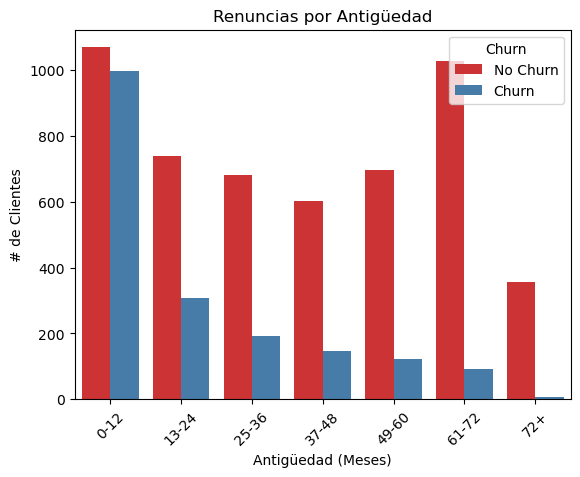

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear categorías para la antigüedad
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]  
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '72+']

# Crear la columna 'Antigüedad_Categoria' en el DataFrame
df['Antigüedad_Categoria'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

# Crear un gráfico de barras
ax = sns.countplot(x='Antigüedad_Categoria', hue='Churn', data=df, palette='Set1')

# Establecer etiquetas y título
ax.set_ylabel('# de Clientes')
ax.set_xlabel('Antigüedad (Meses)')
ax.set_title('Renuncias por Antigüedad')

# Mostrar la leyenda
ax.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



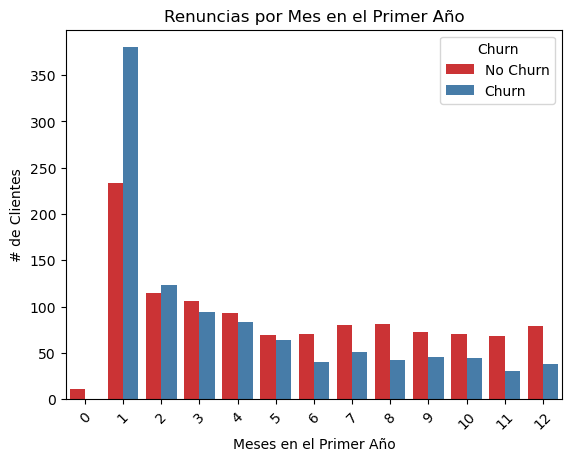

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar solo el primer año de antigüedad
df_primer_anio = df[df['tenure'] <= 12]

# Crear un gráfico de barras para el primer año por mes
ax = sns.countplot(x='tenure', hue='Churn', data=df_primer_anio, palette='Set1')

# Establecer etiquetas y título
ax.set_ylabel('# de Clientes')
ax.set_xlabel('Meses en el Primer Año')
ax.set_title('Renuncias por Mes en el Primer Año')

# Mostrar la leyenda
ax.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


**Cuando analizamos como repercute la antigüedad en la decisión de renuncia, observamos que a menor antigüedad es mas propensa a tomar la decisión de irse**
 
**INSIGHT : Esto puede  deberse que el cliente no sepa o no tenga los medios para valorar los servicios que puede brindar la empresa  y su  experiencia como cliente sea  insuficiente o nula  y que esto  lo lleve a  renunciar.**


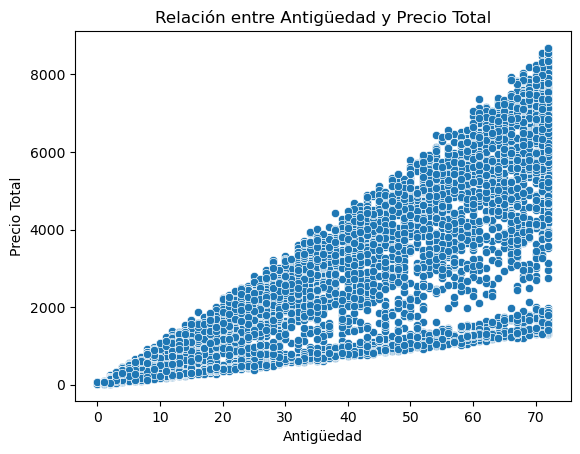

In [22]:
# Supongamos que tenemos un DataFrame llamado df con columnas "antigüedad(tenure)" y "precio_total(Total Charges)"
sns.scatterplot(x='tenure', y='TotalCharges', data=df)

# Puedes personalizar el gráfico agregando etiquetas y un título
plt.xlabel('Antigüedad')
plt.ylabel('Precio Total')
plt.title('Relación entre Antigüedad y Precio Total')

# Muestra el gráfico
plt.show()

**Veo la relación entre antiguedad y precio total y Existe una clara correlación entre los mismos**

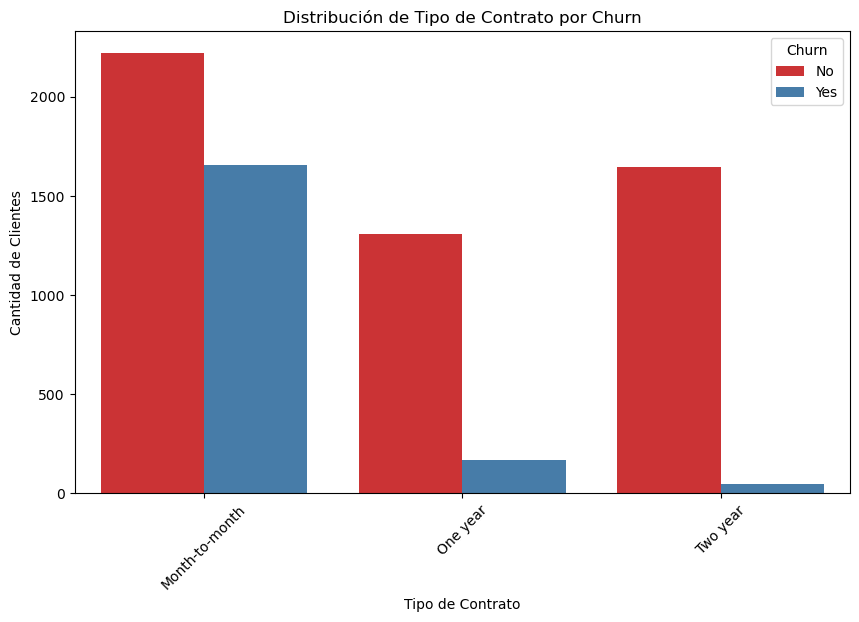

In [23]:
#Analizo la relación de tipo de contrato con la Renuncia(Churn). 


# Crear un gráfico de barras apiladas para el tipo de contrato en función de Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Tipo de Contrato por Churn')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()

**Podemos advertir que los contratos mensuales son los que generan mayor cantidad de renuncias.**

In [24]:
# Verificamos las cantidades por tipo de contrato actual.
df.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

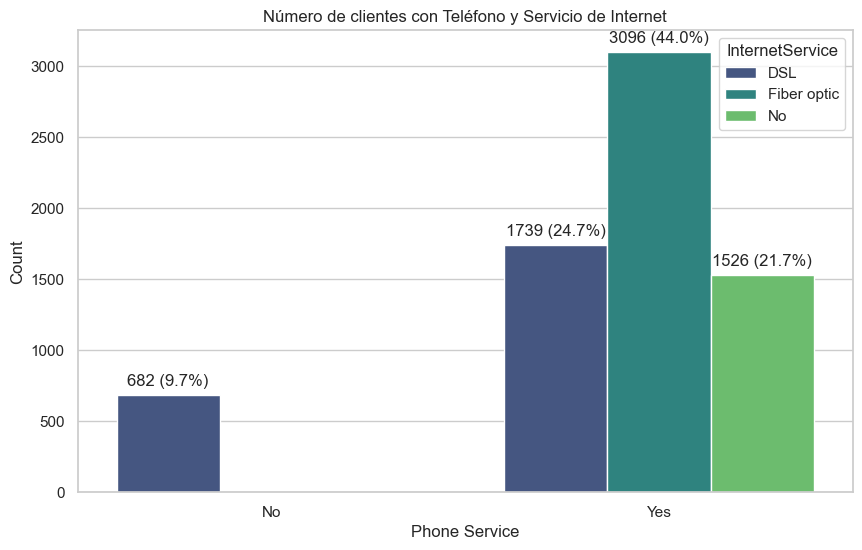

In [25]:
# Crear un nuevo DataFrame para contar la cantidad de servicios
services_df = df[['PhoneService', 'InternetService']].copy()

# Contar la cantidad de cada combinación de servicios
service_counts = services_df.groupby(['PhoneService', 'InternetService']).size().reset_index(name='Count')

# Calcular el porcentaje relativo
service_counts['Relative Percentage'] = (
    service_counts['Count'] / service_counts['Count'].sum() * 100
)

# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras utilizando seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='PhoneService', y='Count', hue='InternetService', data=service_counts, palette='viridis'
)

# Añadir etiquetas con los números y porcentajes encima de las barras
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.0f} ({height / service_counts["Count"].sum() * 100:.1f}%)',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Añadir etiquetas y título
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.title('Número de clientes con Teléfono y Servicio de Internet')

# Mostrar el gráfico
plt.show()




**INSIGHTS:**

**- Del Total de clientes, solo el 9,7% no tiene servicio de telefónía (682 clientes) y el 21,7%no tienen internet.**

**- El servicio de internet mas utilizado es la "fibra óptica" utilizado por el 44% (3096 clientes), seguido por el "DSL " con  el 24,7% (1739 clientes).**


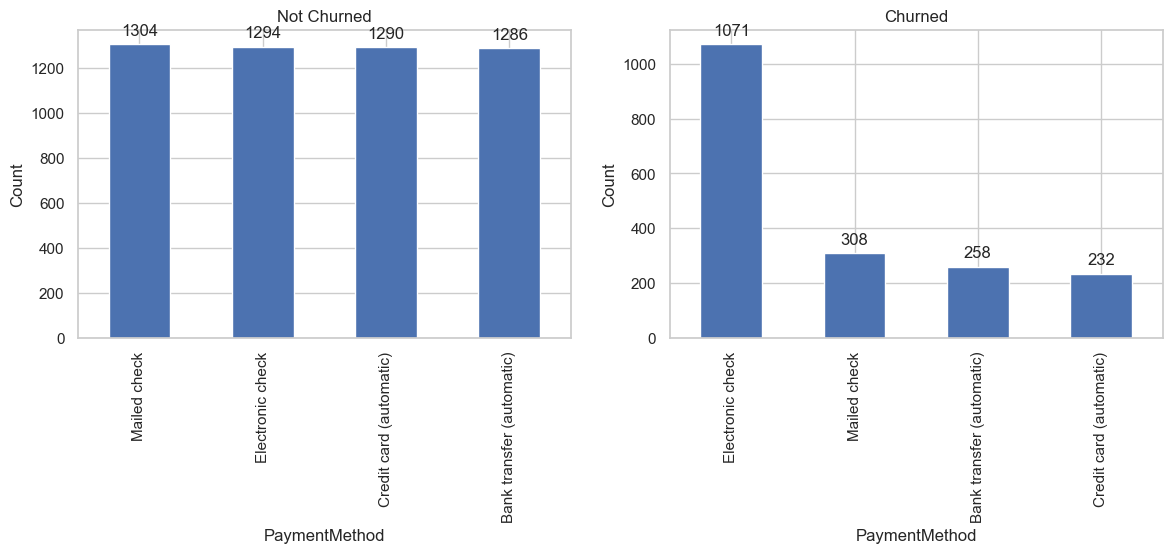

In [26]:
#Busco ver si el método de pago puede influir. Los automáticos desertan menos.

feature = 'PaymentMethod'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Grafico para no churned
df[df.Churn == "No"][feature].value_counts().plot(kind="bar", ax=ax[0])
ax[0].set_title('Not Churned')
ax[0].set_xlabel(feature)
ax[0].set_ylabel('Count')

# Etiquetas con cantidades en cada barra
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Gráfico para churned
df[df.Churn == "Yes"][feature].value_counts().plot(kind="bar", ax=ax[1])
ax[1].set_title('Churned')
ax[1].set_xlabel(feature)
ax[1].set_ylabel('Count')

# Etiquetas con cantidades en cada barra
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**La mayor cantidad de Clientes con pagos electrónicos  son los que renucian
El Pago por Transferencia, por cheques y débito automático son los que los que menos renuncian**


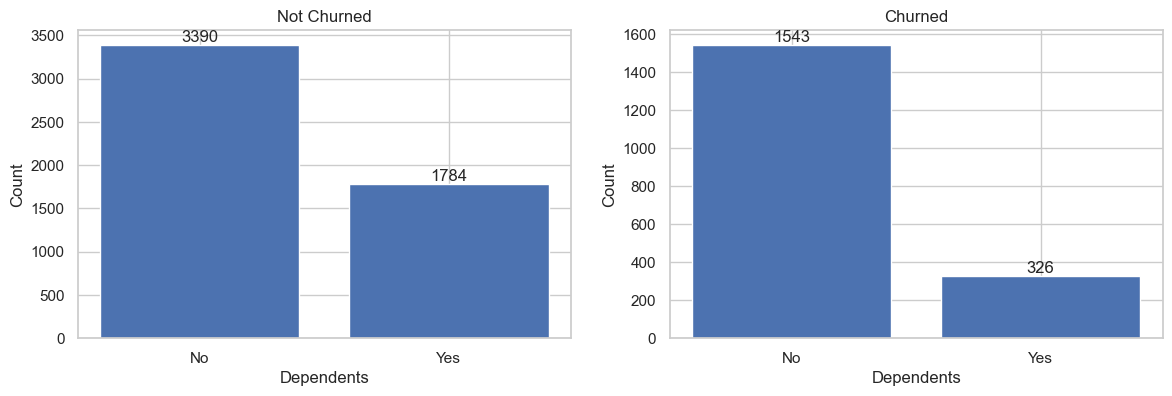

In [27]:
# Analizo los Dependientes
feature = 'Dependents'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico para no churned
counts_no_churned = df[df.Churn == "No"][feature].value_counts()
ax[0].bar(counts_no_churned.index, counts_no_churned)
ax[0].set_title('Not Churned')
ax[0].set_xlabel(feature)
ax[0].set_ylabel('Count')

# Etiquetas con cantidades en cada barra
for i, v in enumerate(counts_no_churned):
    ax[0].text(i, v + 0.1, str(v), ha='center', va='bottom')

# Gráfico para churned
counts_churned = df[df.Churn == "Yes"][feature].value_counts()
ax[1].bar(counts_churned.index, counts_churned)
ax[1].set_title('Churned')
ax[1].set_xlabel(feature)
ax[1].set_ylabel('Count')

# Etiquetas con cantidades en cada barra
for i, v in enumerate(counts_churned):
    ax[1].text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

**Los Clientes que "NO" tienen grupo familiar (dependents) se han ido en mayor proporción.**

<Axes: xlabel='tenure', ylabel='Churn'>

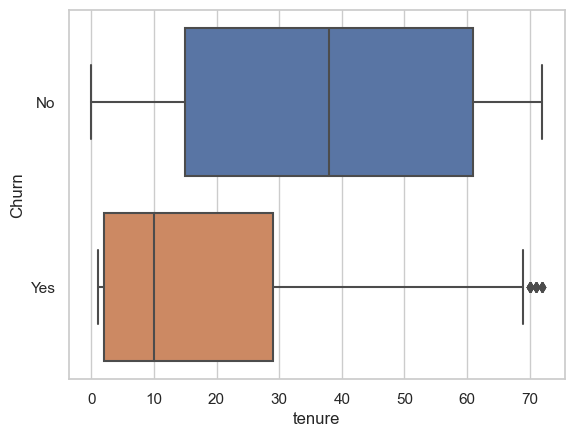

In [28]:
 #Analizo relación entre Tenure(Antiguedad como cliente) y Churn(Renuncia). 

sns.boxplot(x="tenure", y="Churn", data=df)




**Claramente observamos que los que se han ido tenían menos antiguedad (Tenure).**
**Vemos tendencia a fidelización. ---> Importante**

<Axes: xlabel='TotalCharges', ylabel='Churn'>

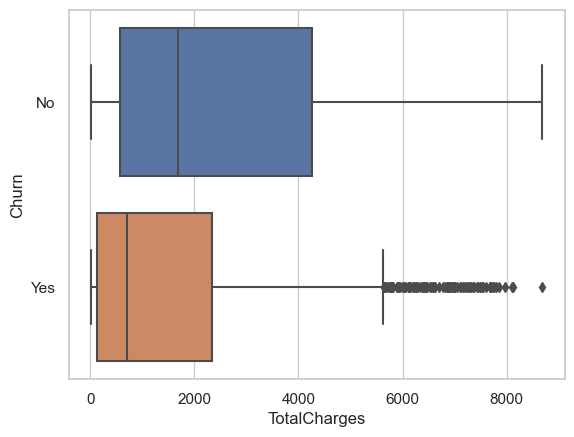

In [29]:

sns.boxplot(x="TotalCharges", y="Churn", data=df)

**Como el tiempo en la empresa y el cobro total estan correlacionados positivamente, es de esperar este resultado.**

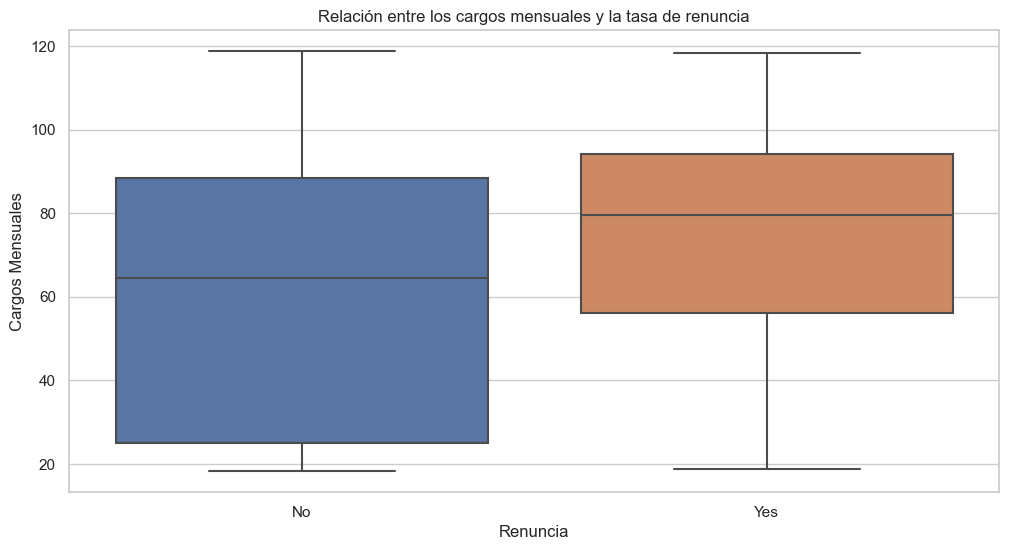

In [30]:

# El gráfico se presenta a continuación:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos
# Crear el gráfico de cajas
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Relación entre los cargos mensuales y la tasa de renuncia")
plt.xlabel("Renuncia")
plt.ylabel("Cargos Mensuales")
plt.show()

**El gráfico muestra que la tasa de renuncia es mayor entre los clientes con cargos mensuales promedios más altos que entre los clientes con cargos mensuales más bajos.**

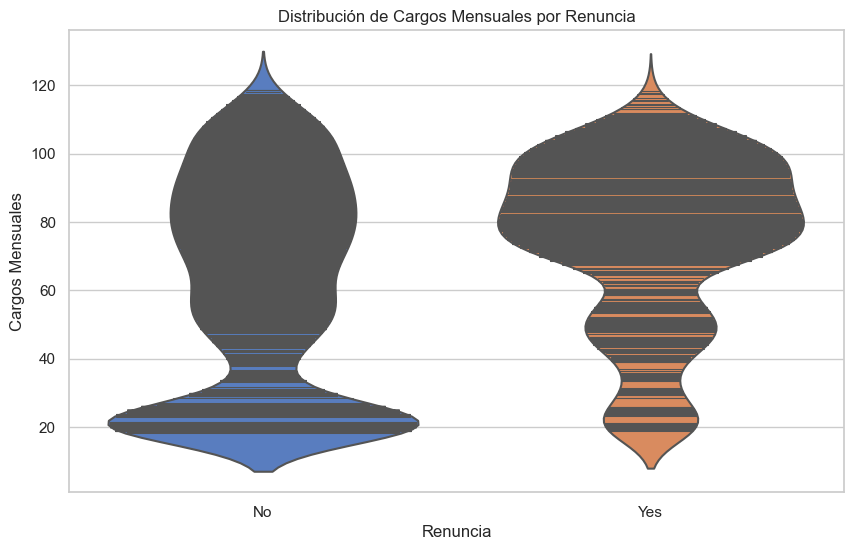

In [31]:
# Grafico de violín que muestra que hay menor  cantidad de cargos mensuales en aquellos  clientes que renuncian
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crea el  gráfico de violín
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette="muted", inner="stick")

# Personaliza el gráfico
plt.title('Distribución de Cargos Mensuales por Renuncia')
plt.xlabel('Renuncia')
plt.ylabel('Cargos Mensuales')
plt.show()

**El gráfico muestra que los clientes que han renunciado (Yes) tienen cargos mensuales más bajos que los clientes que no han renunciado (No). Esto sugiere que los clientes que están satisfechos con su servicio están dispuestos a pagar más.**

## **Features Selection**

In [32]:
# guardo la base para cualquier consulta que quiera realizar
df1 = df.copy(deep = True)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Antigüedad_Categoria
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [33]:
#Desccartamos la columna Customer ID y  Antigüedad_Categoria
columns_to_drop = ['customerID', 'Antigüedad_Categoria']
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [34]:
df1.describe().columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [35]:
#Buscamos aquellos features que no son numéricos si no se encuentran en la función describe.
text_data_features = [i for i in list(df1.columns) if i not in list(df1.describe().columns)]

In [36]:
# Estos son los que deberé converir en 0 y 1
text_data_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [37]:
le = LabelEncoder()
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
SeniorCitizen  :  [0 1]  =  ['No' 'Si']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [38]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [39]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df1["Cant_Internet"] = df1["InternetService"] + df1["OnlineSecurity"] + df1["OnlineBackup"] + df1["DeviceProtection"] + df1["TechSupport"] + df1["StreamingTV"] + df1["StreamingMovies"]

# Cambiar cualquier valor igual a 'No internet service' a 0
df1["Cant_Internet"] = df1["Cant_Internet"].apply(lambda x: 0 if x == 'No internet service' else x)

# Cambiar cualquier valor mayor a 1 a 1
df1["Cant_Internet"] = df1["Cant_Internet"].clip(upper=1)

In [40]:
# Creo la columna para saber si tienen servicio telefónico
df1["PhoneServices"]= df1["PhoneService"]+df1["MultipleLines"]
#Creo columna para ver quienes tienen internet + telefono.
df1["pack"]= df1["PhoneServices"] + df1["InternetService"]

In [41]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,1,1,1
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,1,1,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,1,1,1
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,1,1,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,1,1,2


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


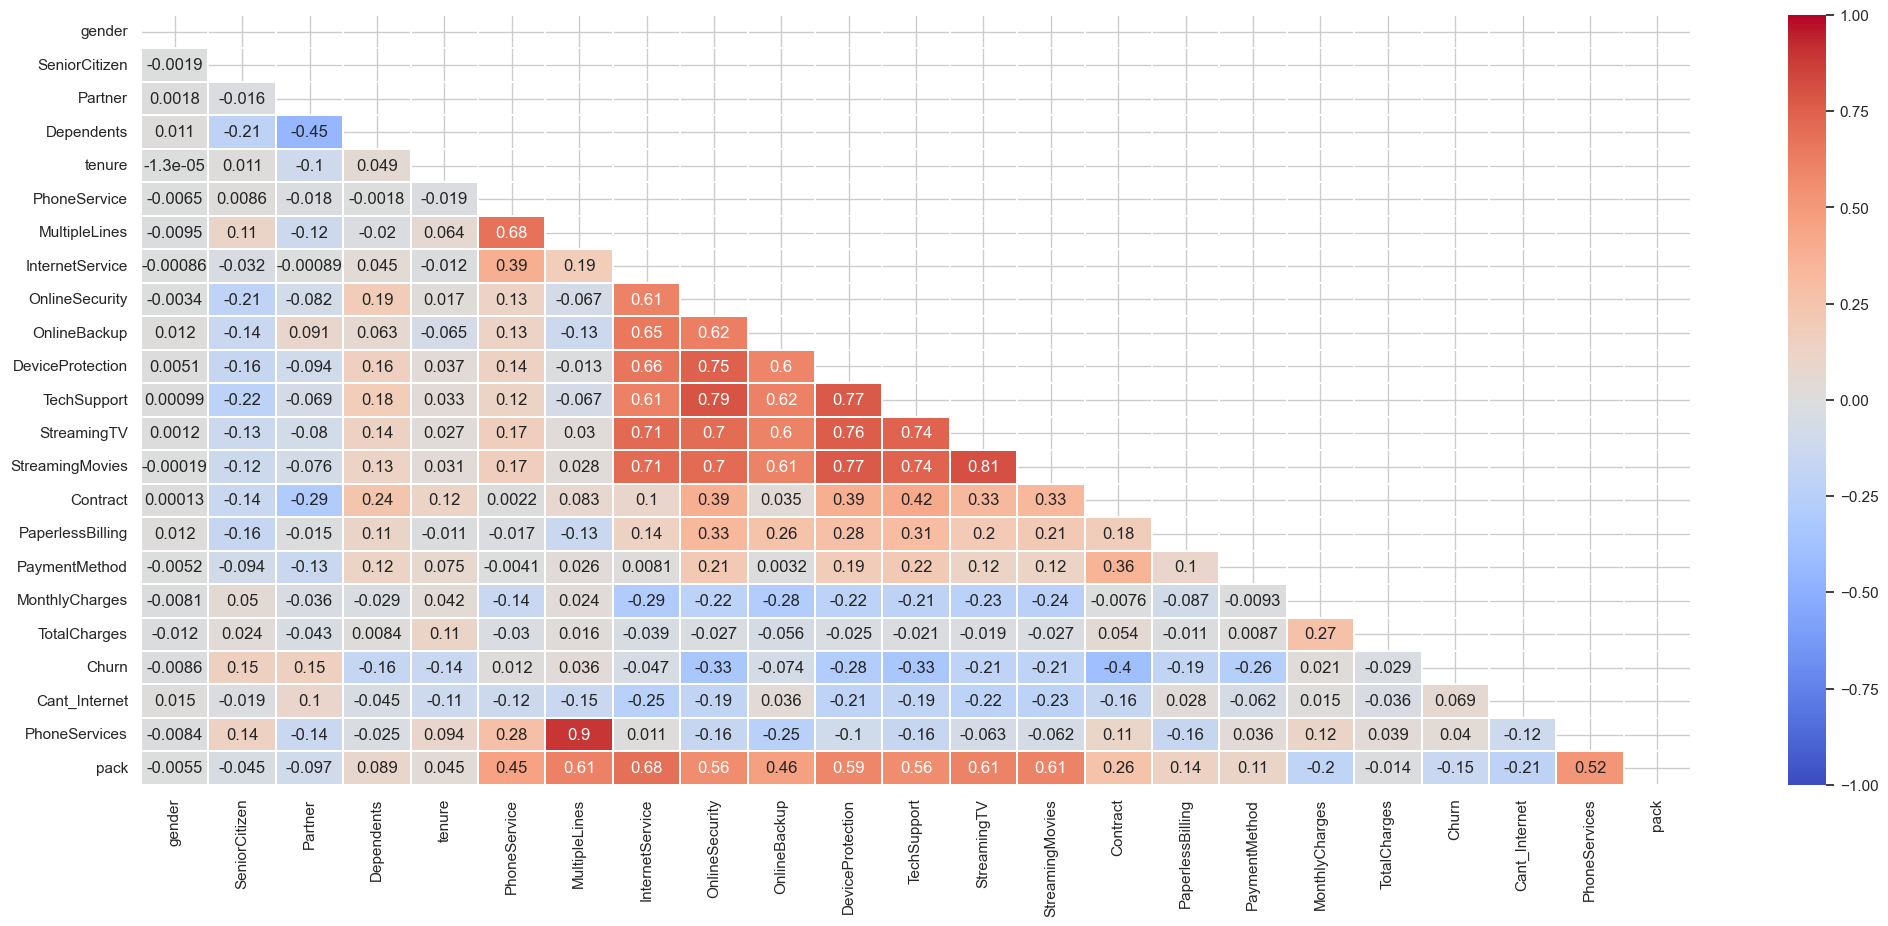

In [43]:
plt.figure(figsize=(25, 10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: xlabel='pack', ylabel='Churn'>

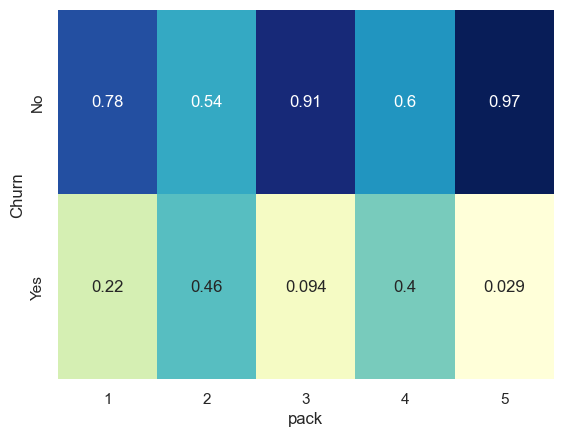

In [44]:
sns.heatmap(pd.crosstab(df.Churn, df1.pack, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

**En este caso no parece haber una relacion clara entre los que dejan y los principales servicios(telefono, internet). 
Dejaron la empresa en un porcentaje mayor los que poseián internet + teléfono.**

<Axes: xlabel='Cant_Internet', ylabel='Churn'>

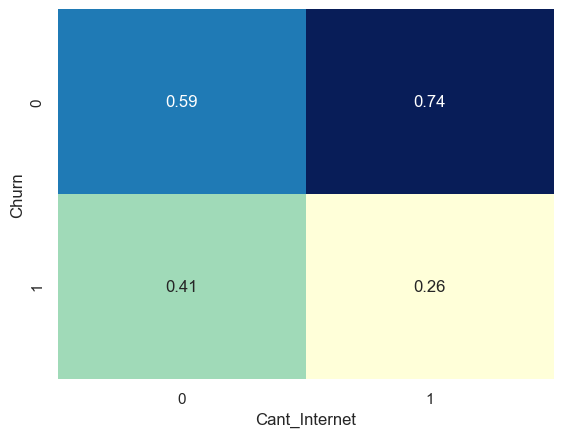

In [45]:
sns.heatmap(pd.crosstab(df1.Churn, df1.Cant_Internet, normalize='columns'),
            cmap="YlGnBu", annot=True, cbar=False)

**Observamos claramente como a mayor cantidad de servicios de internet contratados menos se deja la empresa.
Muy importante esta relación. Parece ser que mientras más servicios tiene una persona es más probable que de querer bajar sus gastos pueda dar de baja algún servicio y no darse de baja de la empresa.**

**Mientras más servicios se tenga, también nos puede llegar a decir algo sobre el poder adquisitivo de la persona y por lo que no se verá afectado en una crisis económica tanto. También podemos suponer una mayor satisfacción con la empresa si es cliente longevo y con muchos servicios. Menos fáctible que sea seducido por competidores.**

Media de tenure: 32.37114865824223
Media de MonthlyCharges: 64.76169246059918
Media de TotalCharges: 2279.798991906858


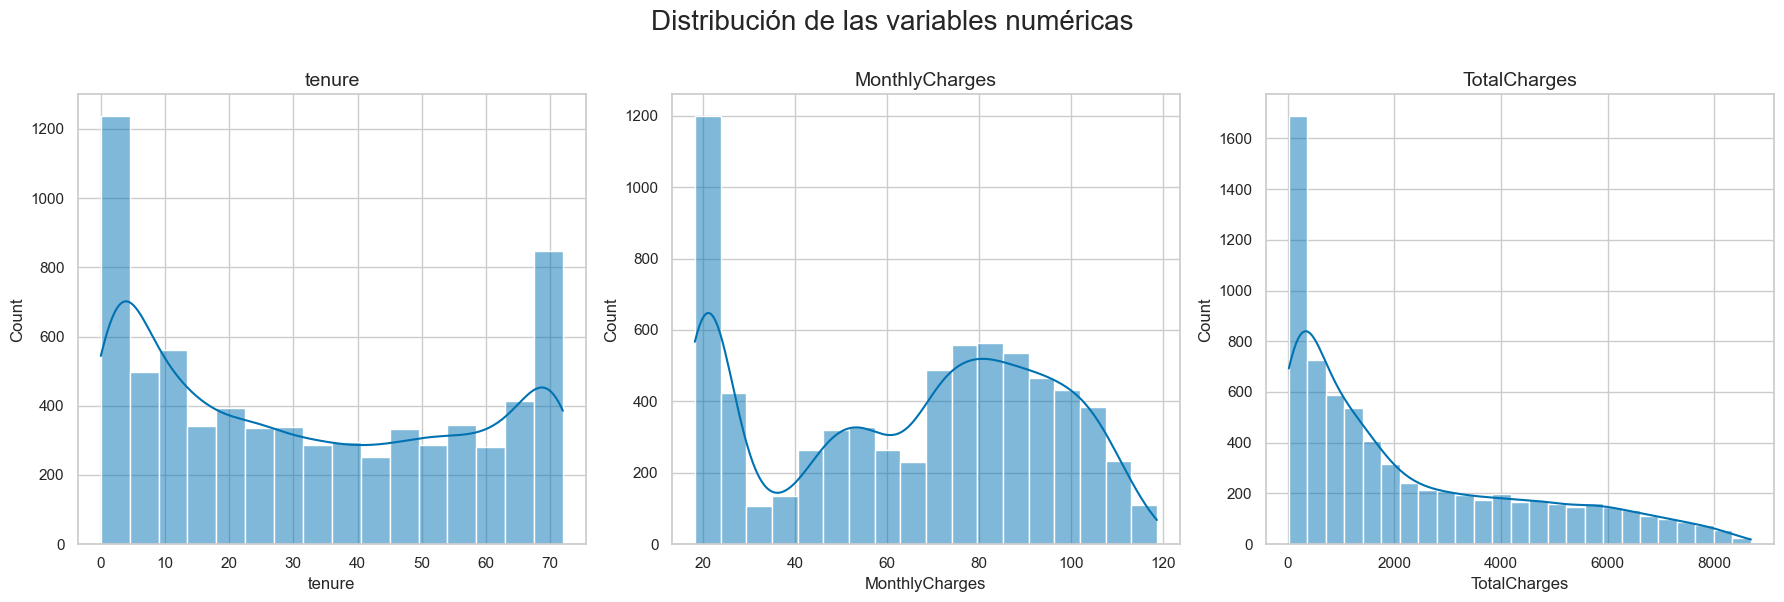

In [46]:
# Distribución de las principales variables
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.0)

# Variables numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df1, ax=axs[i], kde=True, color='#0072B2')
    axs[i].set_title(col, fontsize=14)
    print(f'Media de {col}: {df1[col].mean()}')
    
plt.tight_layout()
plt.show()

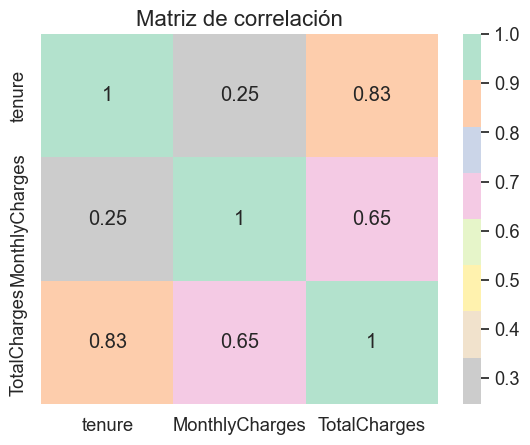

In [47]:
# Correlación entre variables numéricas
corr_matrix = df1[num_cols].corr()

sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2_r')
plt.title('Matriz de correlación', fontsize=16)
plt.show()

## Se verifica una fuerte correlación del total de cargos y la antiguedad como cliente

## FILTER FEATURE SELECTION

**Hacemos una preselección de las variables a través del cálculo de correlación contra la variable "Churn".**

In [50]:
# Elimina las columnas no numéricas antes de calcular la correlación
df_numeric = df1.select_dtypes(include=['float64', 'int64'])
df_numeric = df1.select_dtypes(include=['int', 'int64'])

# Calcula la matriz de correlación
matriz_correlacion = df_numeric.corr(method='pearson')

# Selecciona la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Churn'].abs()

# Excluye columnas específicas del análisis de correlación
columnas_a_excluir = ['Churn']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)

# Ordena de mayor a menor correlación 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

# Muestra la matriz de correlación
print(matriz_correlacion_target)

Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
OnlineBackup        0.195525
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
Cant_Internet       0.069108
InternetService     0.047291
PhoneServices       0.040102
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
pack                0.003809
Name: Churn, dtype: float64


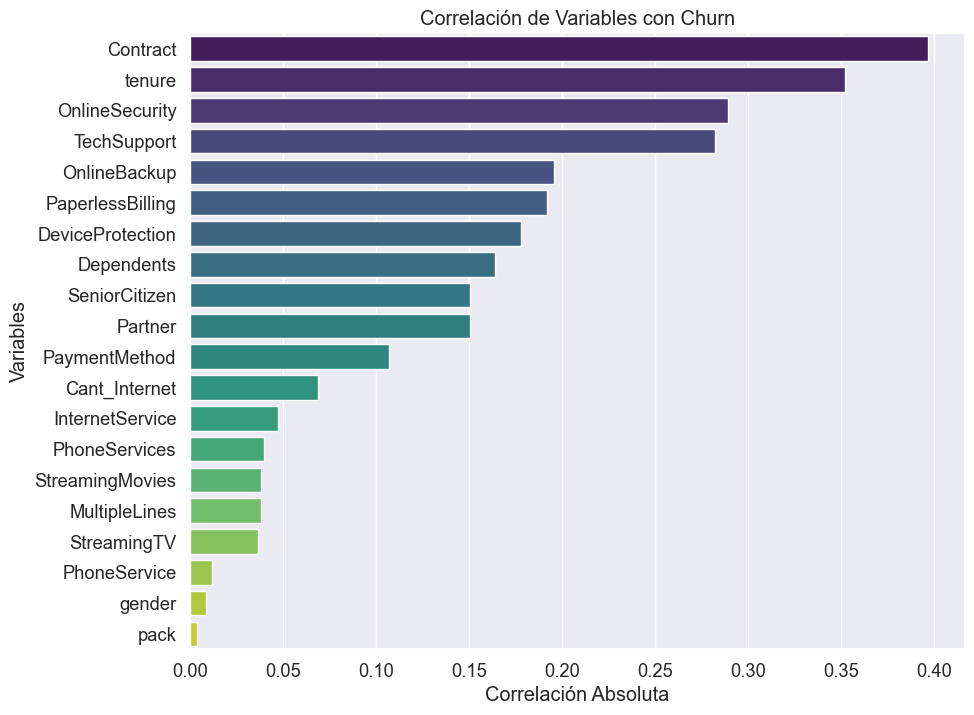

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea un gráfico de barras horizontales
sns.barplot(x=matriz_correlacion_target, y=matriz_correlacion_target.index, palette="viridis")

# Añade etiquetas y título
plt.xlabel('Correlación Absoluta')
plt.ylabel('Variables')
plt.title('Correlación de Variables con Churn')

# Muestra el gráfico
plt.show()

# Wrapper Feature Selection
**Forward selection**

In [52]:
valores_nulos  = df1.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos == 0]
columnas_con_nulos

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Cant_Internet       0
PhoneServices       0
pack                0
dtype: int64

In [53]:
# Defino función para hacer la selección de variables eligiendo la que tenga menor "P Value"
import statsmodels.api as sm
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [54]:
# Matriz de Features
X = df1[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'pack', 'Cant_Internet']]

# Target
y = df1['Churn']

In [55]:
VARIABLES_ELEGIDAS = forward_selection(data = X,
                                       target = y,
                                       significance_level = 0.01)
print("Quedaron seleccionadas:")
VARIABLES_ELEGIDAS

Quedaron seleccionadas:


['Contract',
 'MonthlyCharges',
 'tenure',
 'OnlineSecurity',
 'TechSupport',
 'PaperlessBilling',
 'OnlineBackup',
 'SeniorCitizen',
 'PhoneService',
 'InternetService',
 'DeviceProtection']

## Obtenemos sobre otro método por " Coeficiente de Determinación R2"

In [56]:
sfs = SFS(LinearRegression(),
          k_features = 9,
          forward = True,
          floating = False,
          scoring = 'r2',
          cv = 0)

In [57]:
sfs.fit(X, y)
sfs.k_feature_names_

('SeniorCitizen',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges')

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features=9,
          forward=True,
          floating=False,
          scoring='r2',
          cv=0)

sfs.fit(X, y)

# Obtenemos las características ordenadas por R² junto con los nombres de las variables
caracteristicas_ordenadas = sorted(sfs.subsets_, key=lambda k: sfs.subsets_[k]['avg_score'], reverse=True)

#Obtenemos los nombres de las columnas correspondientes a las características ordenadas
nombres_caracteristicas_ordenadas = [list(X.columns[list(sfs.subsets_[i]['feature_idx'])]) for i in caracteristicas_ordenadas]

# Imprime las características ordenadas junto con los nombres de las variables
for i, caracteristica in enumerate(caracteristicas_ordenadas):
    print(f"Conjunto {i + 1}: R² = {sfs.subsets_[caracteristica]['avg_score']:.4f}, Características: {nombres_caracteristicas_ordenadas[i]}")



Conjunto 1: R² = 0.2614, Características: ['SeniorCitizen', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
Conjunto 2: R² = 0.2594, Características: ['SeniorCitizen', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
Conjunto 3: R² = 0.2566, Características: ['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
Conjunto 4: R² = 0.2535, Características: ['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
Conjunto 5: R² = 0.2496, Características: ['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges']
Conjunto 6: R² = 0.2389, Características: ['tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges']
Conjunto 7: R² = 0.2240, Características: ['tenure', 'Contract', 'MonthlyCharges']
Conjunto 8: R² = 0.1844, Características: ['Contract', 'Mo

In [60]:
# Generar predictores para 'Contract'
contract_pred = df1.groupby('Contract')['Churn'].mean().reset_index()
contract_pred.columns = ['Contract', 'Contract_pred']
df1 = df1.merge(contract_pred, on='Contract', how='left')

# Generar predictores para 'tenure'
tenure_pred = df1.groupby('tenure')['Churn'].mean().reset_index()
tenure_pred.columns = ['tenure', 'tenure_pred']
df1 = df1.merge(tenure_pred, on='tenure', how='left')




In [61]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack,Contract_pred,tenure_pred
0,0,0,1,0,1,0,1,0,0,2,...,1,2,29.85,29.85,0,1,1,1,0.427097,0.619902
1,1,0,0,0,34,1,0,0,2,0,...,0,3,56.95,1889.50,0,1,1,1,0.112695,0.184615
2,1,0,0,0,2,1,0,0,2,2,...,1,3,53.85,108.15,1,1,1,1,0.427097,0.516807
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,1,1,1,0.112695,0.098361
4,0,0,0,0,2,1,0,1,0,0,...,1,2,70.70,151.65,1,1,1,2,0.427097,0.516807


## TRAIN Y TEST 

In [62]:
# Dividimos aleatoriamente los datos en conjuntos de entrenamiento y prueba para modelos de aprendizaje automático.
cantidad_registros = df1.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df1['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [63]:
print(f"La cantidad de datos para entrenamiento son {df1['TRAIN'].sum()} y para test son {df1.shape[0] - df1['TRAIN'].sum()}")

La cantidad de datos para entrenamiento son 5051 y para test son 1992


# Modelamos

In [64]:
# Cómo quedó la división??
resumen = df1.groupby('TRAIN').agg(      
    Cant = ('Churn', 'count'),
    Cant_Renuncia = ('Churn', 'sum'),    
    Tasa_Renuncia = ('Churn', 'mean')
).reset_index()
# Calcular la tasa de éxito en porcentaje
resumen['Tasa_Renuncia'] = (resumen['Tasa_Renuncia'] * 100).round(1)
resumen

,TRAIN,Cant,Cant_Renuncia,Tasa_Renuncia
0,0,1992,550,27.6
1,1,5051,1319,26.1


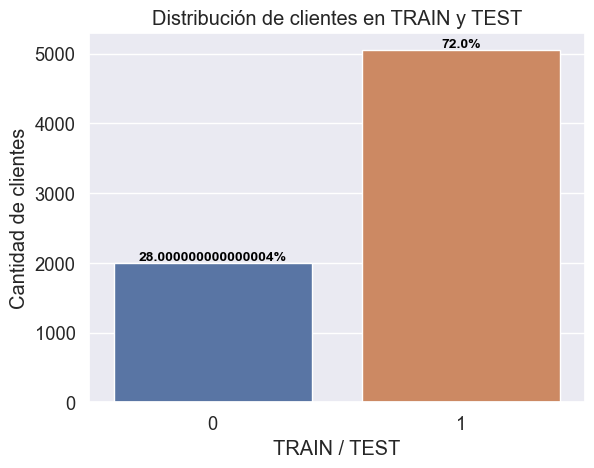

In [65]:
cantidad = len(df1['Churn'])

sns.countplot(data = df1,
              x = "TRAIN")
plt.xlabel('TRAIN / TEST')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de clientes en TRAIN y TEST')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '¿Es la tasa de renuncia igual en ambas subporciones de la muestra?')

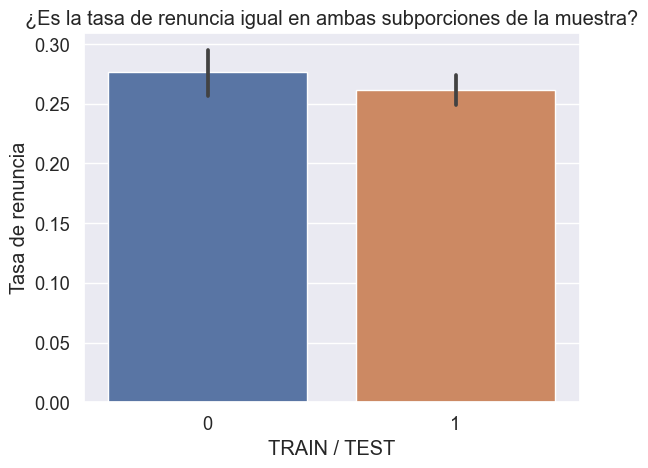

In [66]:
sns.barplot(data = df1,
                x = 'TRAIN',
                y = 'Churn')
plt.xlabel('TRAIN / TEST')
plt.ylabel('Tasa de renuncia')
plt.title('¿Es la tasa de renuncia igual en ambas subporciones de la muestra?')

## La respuesta es **"Son similares  =>Para Entrenamiento es del 27,1 % y para test es del 25,3%"**

# Modelo Base - Regresión Logística

In [67]:
# Genero el modelo
formula = "Churn ~ Contract_pred+tenure_pred+InternetService+PaymentMethod"
reg_log = smf.logit(formula, data = df1[df1['TRAIN']==1]).fit()
# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.465135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5051
Model:                          Logit   Df Residuals:                     5046
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.1900
Time:                        10:41:49   Log-Likelihood:                -2349.4
converged:                       True   LL-Null:                       -2900.5
Covariance Type:            nonrobust   LLR p-value:                2.525e-237
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.3938      0.124    -27.273      0.000      -3.638      -3.150
Contract_pred 

In [68]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept         -3.3938
Contract_pred      5.0598
tenure_pred        2.9904
InternetService   -0.0760
PaymentMethod     -0.0528
dtype: float64

P-Values:
Intercept          0.000000
Contract_pred      0.000000
tenure_pred        0.000000
InternetService    0.149827
PaymentMethod      0.166481
dtype: float64


El modelo indica que hay una relación significativa entre las variables predictoras (Contract y PaymentMethod) y la variable dependiente Churn(Renuncia). 

1. Coeficientes del Modelo:
Intercept: -3.2840
Contract_pred: 4.8797
tenure_pred: 3.2284
InternetService: -0.0987
PaymentMethod: -0.0981
2. Estadísticas de Ajuste del Modelo:
Pseudo R-squared: 0.1884
El Pseudo R-squared proporciona una medida de cuánta varianza en la variable de respuesta (Churn) se explica por el modelo. En este caso, el 18.84% de la variabilidad se explica por las variables en el modelo.
Log-Likelihood: -2340.3
La log-verosimilitud es una medida de la adecuación del modelo. Cuanto más alto, mejor se ajusta el modelo a los datos.
3. Evaluación de la Convergencia:
Convergencia: Sí (converged: True)
Indica que el algoritmo de optimización ha convergido con éxito a una solución.
4. Pruebas de Significancia:
Prueba de Razón de Verosimilitud (LLR p-value): 6.449e-234
El p-valor extremadamente bajo indica que al menos una de las variables en el modelo es significativa para predecir la variable de respuesta "Churn".
5. Interpretación de Coeficientes:
Intercept: El log-odds de "Churn" cuando todas las demás variables son cero.
Contract_pred: Un aumento en la variable Contract_pred se asocia con un aumento de 4.8797 unidades en el log-odds de "Churn".
tenure_pred: Un aumento en la variable tenure_pred se asocia con un aumento de 3.2284 unidades en el log-odds de "Churn".
InternetService: Un aumento en la variable InternetService se asocia con una disminución de 0.0987 unidades en el log-odds de "Churn".
PaymentMethod: Un aumento en la variable PaymentMethod se asocia con una disminución de 0.0981 unidades en el log-odds de "Churn".


In [69]:
# Predicciones 
df1['Predict_Prob_RegLog_1'] = reg_log.predict(df1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack,Contract_pred,tenure_pred,TRAIN,Predict_Prob_RegLog_1
0,0,0,1,0,1,0,1,0,0,2,...,29.85,29.85,0,1,1,1,0.427097,0.619902,0,0.626076
1,1,0,0,0,34,1,0,0,2,0,...,56.95,1889.50,0,1,1,1,0.112695,0.184615,1,0.080924
2,1,0,0,0,2,1,0,0,2,2,...,53.85,108.15,1,1,1,1,0.427097,0.516807,0,0.538508
3,1,0,0,0,45,0,1,0,2,0,...,42.30,1840.75,0,1,1,1,0.112695,0.098361,0,0.073818
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,1,2,0.427097,0.516807,1,0.532739


Estas probabilidades representan la probabilidad estimada de que cada observación en el conjunto de datos pertenezca a la clase positiva ( 'Churn').

<Axes: xlabel='Predict_Prob_RegLog_1', ylabel='Probability'>

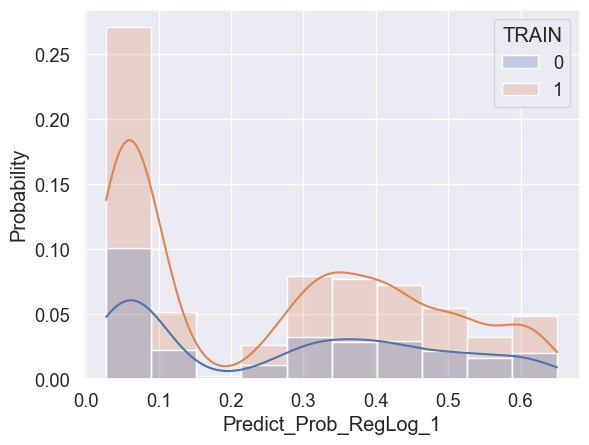

In [70]:
# Análisis de distribución: ¿Las predicciones se distribuyen igual?
sns.histplot(data = df1,
             x = 'Predict_Prob_RegLog_1',
             bins = 10,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             hue = 'TRAIN')

In [71]:
# Groupby por prediccion de clase: 
df1['Predict_RegLog_Clase'] = df1['Predict_Prob_RegLog_1'] > 0.5
resultados = df1.groupby('Predict_RegLog_Clase').agg(
    Cant = ('Predict_RegLog_Clase', 'count'),              
    Cant_Churn = ('Churn', 'sum'),            
    Tasa_Churn = ('Churn', 'mean')    
).reset_index()
resultados

,Predict_RegLog_Clase,Cant,Cant_Churn,Tasa_Churn
0,False,5942,1230,0.207001
1,True,1101,639,0.580381


Grupo False (Probabilidad <= 0.5):

Hay 5835 observaciones en este grupo.

De estas, 1154 están clasificadas como "Churn".

La tasa de "Churn" en este grupo es 0.197772 (19.77%).

Grupo True (Probabilidad > 0.5):

Hay 1208 observaciones en este grupo.

De estas, 715 están clasificadas como "Churn".

La tasa de "Churn" en este grupo es 0.591887 (59.19%).

Esta tabla te proporciona información sobre cómo se distribuyen las predicciones del modelo en función de la probabilidad y cómo se relaciona con la ocurrencia de "Churn". El grupo con probabilidades mayores a 0.5 tiene una tasa de "Churn" más alta en comparación con el grupo con probabilidades menores o iguales a 0.5.

## **Métricas:**

**A continuación vamos a calcular algunas métricas y análisis interesantes:**

**Matriz de confusión: usaremos un corte de 40% para definir la clasificación de sobrevive o no. Es decir, si la probabilidad es > 0.4, entonces asumimos que sobrevive.
Métricas que surgen de esa matriz
Curva de ROC y AUC**

In [72]:
# 1) Matriz de Confusión 
# Paso 1: Clasificar a los Clientes según las predicciones 
df1['Churn_Pred_1'] = np.where(df1['Predict_Prob_RegLog_1'] > 0.4, 1, 0)

# Paso 2:  Calcular la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df1[df1['TRAIN'] == 1]['Churn'], 
                                           df1[df1['TRAIN'] == 1]['Churn_Pred_1'])

confusion_test = confusion_matrix(df1[df1['TRAIN'] == 0]['Churn'], 
                                    df1[df1['TRAIN'] == 0]['Churn_Pred_1'])

print('Matriz de Confusión en entrenamiento:')
print(confusion_entrenamiento)
print('Matriz de Confusión en testeo:')
print(confusion_test)


Matriz de Confusión en entrenamiento:
[[3018  714]
 [ 556  763]]
Matriz de Confusión en testeo:
[[1145  297]
 [ 228  322]]


**Matriz de Confusión en Entrenamiento:**


Verdaderos Positivos (TP): 786

El modelo predijo correctamente la clase positiva (Churn) en 786 casos.

Verdaderos Negativos (TN): 2876

El modelo predijo correctamente la clase negativa (No Churn) en 2876 casos.

Falsos Positivos (FP): 724

El modelo predijo incorrectamente la clase positiva (Churn) en 724 casos (falsos alarmas de Churn).

Falsos Negativos (FN): 551

El modelo predijo incorrectamente la clase negativa (No Churn) en 551 casos (omisiones de Churn).


**Matriz de Confusión en Testeo:**

Verdaderos Positivos (TP): 311

El modelo predijo correctamente la clase positiva (Churn) en 311 casos.

Verdaderos Negativos (TN): 1271

El modelo predijo correctamente la clase negativa (No Churn) en 1271 casos.
Falsos Positivos (FP): 303


El modelo predijo incorrectamente la clase positiva (Churn) en 303 casos (falsos alarmas de Churn).
Falsos Negativos (FN): 221


El modelo predijo incorrectamente la clase negativa (No Churn) en 221 casos (omisiones de Churn).

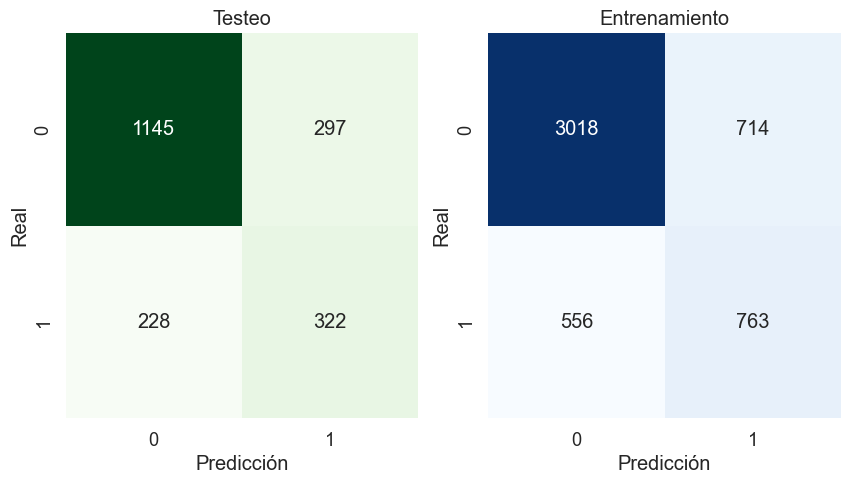

In [73]:
# Paso 3: Grafico
# Primero defino la estructura de mis gráficos a mostras
fig, ax = plt.subplots(nrows = 1,
                      ncols = 2,
                      figsize = (10,5)) 

# Luego indico lo que voy a dibujar en el primer cuadrante
sns.heatmap(confusion_test, 
            annot=True, fmt='d', cmap='Greens', cbar=False, 
            ax=ax[0])
ax[0].set_title('Testeo')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Real')

# Luego indico lo que voy a dibujar en el segundo cuadrante
sns.heatmap(confusion_entrenamiento, 
            annot=True, fmt='d', cmap='Blues', cbar=False, 
            ax=ax[1])
ax[1].set_title('Entrenamiento')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Real')

# Muestra
plt.show()

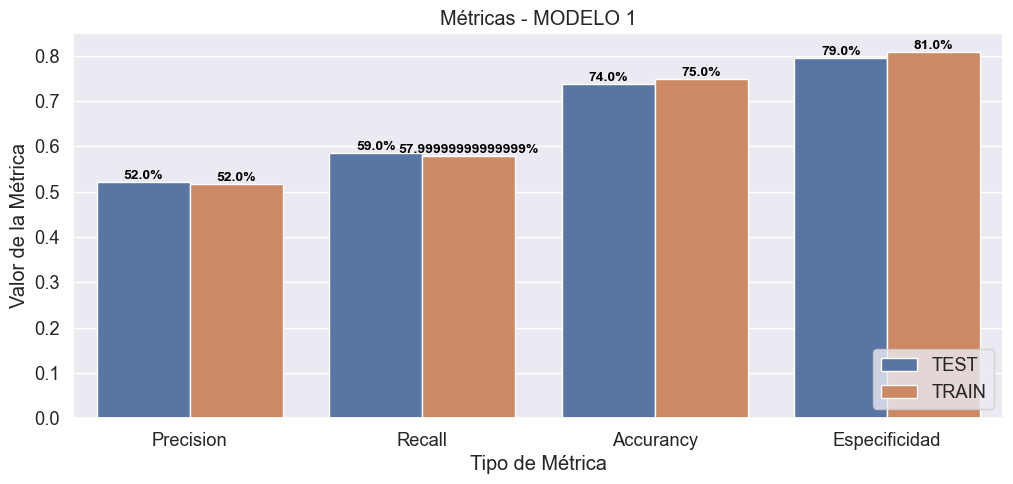

In [74]:
# 2) Calculemos las metricas, para eso vamos a guardar el resultado de cada cuadrante para utilizarlos 

# Paso 1: capturo cada uno de los elementos de la matriz de confusión 
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Paso 2: Calculo métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Paso 3: Presento todo en una misma tabla 
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica','Valor'])

# Precision
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Precision',
              'Valor': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Precision',
              'Valor': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Recall',
              'Valor': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Recall',
              'Valor': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Paso 4: Grafico 
plt.figure(figsize=(12, 5))
sns.barplot(data=metricas,
            x='Metrica',
            y='Valor',
            hue='Poblacion')
plt.xlabel('Tipo de Métrica')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas - MODELO 1')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text, 2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(loc='lower right')    
plt.show()


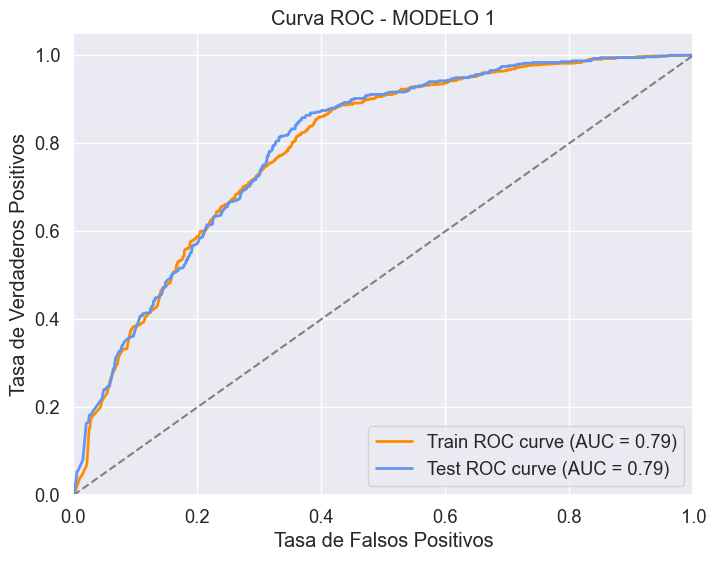

In [75]:
# 3) Curvas de ROC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba

y_train = df1.loc[df1['TRAIN'] == 1,'Churn']
y_train_proba = df1.loc[df1['TRAIN'] == 1,'Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df1.loc[df1['TRAIN'] == 0,'Churn']
y_test_proba = df1.loc[df1['TRAIN'] == 0,'Predict_Prob_RegLog_1']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

Conclusiones:

El modelo tiene un buen desempeño en la clasificación general, con un alto valor de accuracy.
La precisión y el recall varían entre las clases, con una mayor precisión para la clase 0 y un recall más bajo para la clase 1.
El f1-score ponderado proporciona una medida general del rendimiento del modelo.
Las métricas de validación cruzada refuerzan la evaluación del modelo en diferentes particiones del conjunto de datos, mostrando una consistencia en su rendimiento.


## Modelo 2 - RANDOM FOREST

Exactitud del modelo: 0.78


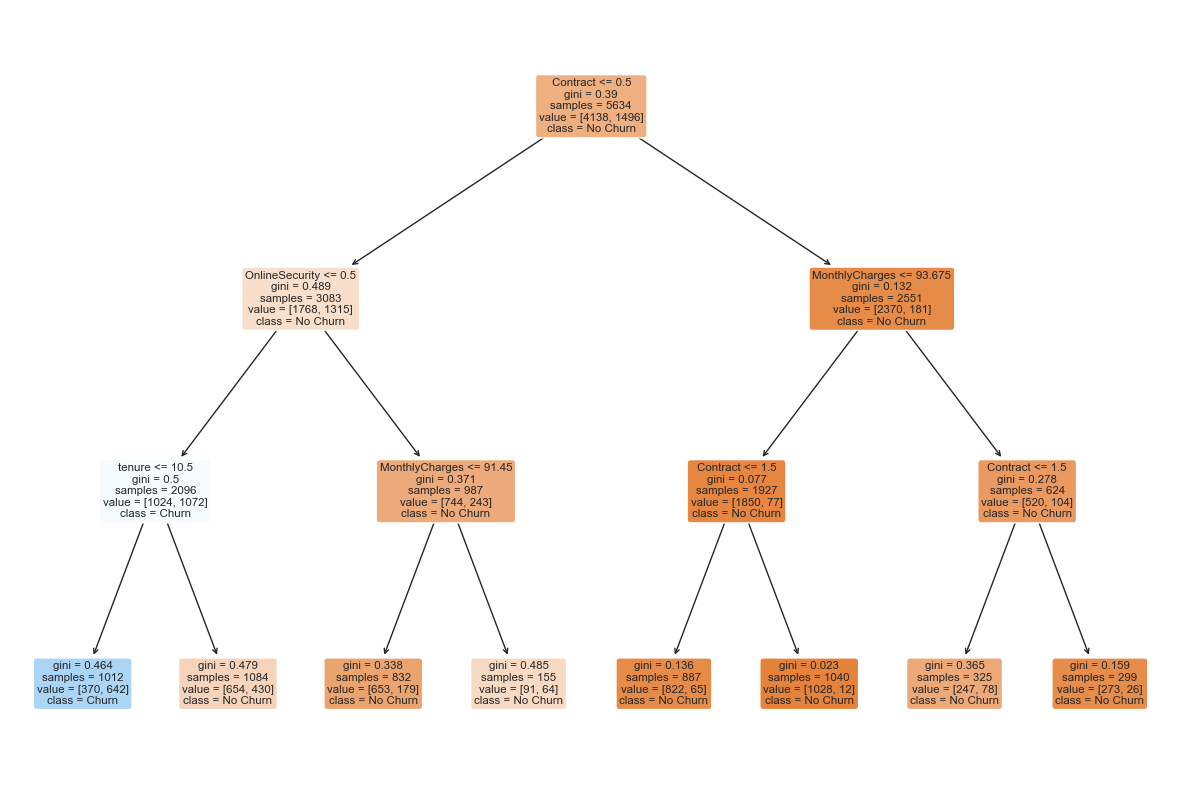

In [76]:
from sklearn.tree import plot_tree

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

# Seleccionar características y variable objetivo
features = ['MonthlyCharges', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'OnlineBackup', 'SeniorCitizen']
target = 'Churn'

# Crear un clasificador de árbol de decisión con una profundidad máxima de 3 niveles
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenar el modelo
dt_classifier.fit(train_data[features], train_data[target])

# Realizar predicciones en el conjunto de prueba
predictions = dt_classifier.predict(test_data[features])

# Calcular la exactitud del modelo en el conjunto de prueba
accuracy = metrics.accuracy_score(test_data[target], predictions)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Visualizar el árbol de decisión con una profundidad máxima de 3 niveles
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font_scale=1)
sns.despine(left=True)
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")

plot_tree(dt_classifier, feature_names=features, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.show()

Matriz de Confusión:
          No Churn  Churn
No Churn       945     91
Churn          217    156


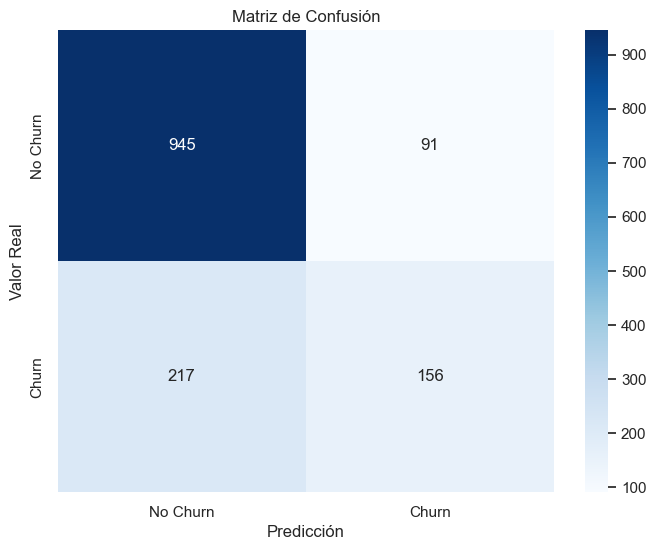

In [77]:
conf_matrix = metrics.confusion_matrix(test_data[target], predictions)

# Crear un DataFrame de pandas para representar la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

# Visualizar el DataFrame
print("Matriz de Confusión:")
print(confusion_df)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

No Churn / No Churn (945): Hay 945 instancias que originalmente pertenecen a la clase "No Churn" y que fueron correctamente clasificadas como "No Churn" por el modelo. Estos son los Verdaderos Negativos (TN).

No Churn / Churn (91): Hay 91 instancias que originalmente pertenecen a la clase "No Churn" pero que fueron incorrectamente clasificadas como "Churn" por el modelo. Estos son los Falsos Positivos (FP).

Churn / No Churn (217): Hay 217 instancias que originalmente pertenecen a la clase "Churn" pero que fueron incorrectamente clasificadas como "No Churn" por el modelo. Estos son los Falsos Negativos (FN).

Churn / Churn (156): Hay 156 instancias que originalmente pertenecen a la clase "Churn" y que fueron correctamente clasificadas como "Churn" por el modelo. Estos son los Verdaderos Positivos (TP).

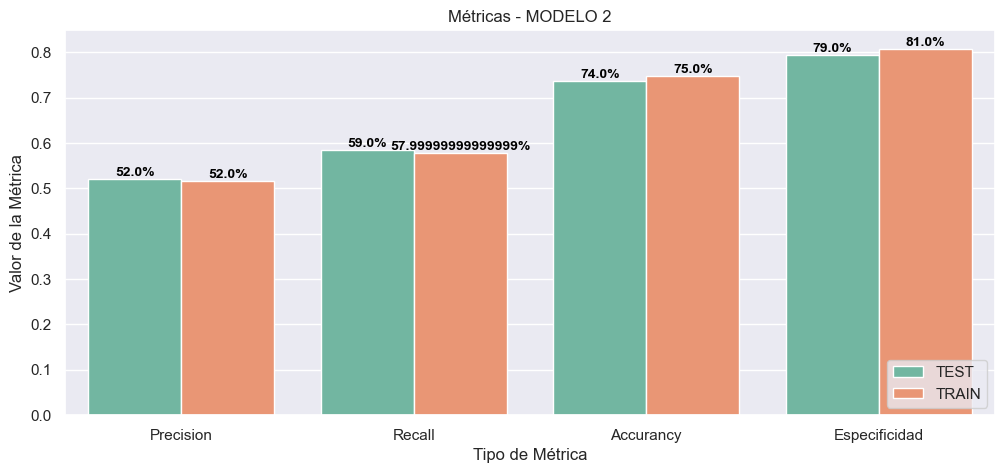

In [78]:
# Paso 1: Capturar cada uno de los elementos de la matriz de confusión
Total_TEST = sum(sum(confusion_test))
Total_TRAIN = sum(sum(confusion_entrenamiento))
TP_TEST = confusion_test[1,1]
TP_TRAIN = confusion_entrenamiento[1,1]
TN_TEST = confusion_test[0,0]
TN_TRAIN = confusion_entrenamiento[0,0]
FP_TEST = confusion_test[0,1]
FP_TRAIN = confusion_entrenamiento[0,1]
FN_TEST = confusion_test[1,0]
FN_TRAIN = confusion_entrenamiento[1,0]

# Paso 2: Calcular métricas
Precision_TEST = TP_TEST / (TP_TEST + FP_TEST)
Precision_TRAIN = TP_TRAIN / (TP_TRAIN + FP_TRAIN)
Recall_TEST = TP_TEST / (TP_TEST + FN_TEST)
Recall_TRAIN = TP_TRAIN / (TP_TRAIN + FN_TRAIN)
Accurancy_TEST = (TP_TEST + TN_TEST) / Total_TEST
Accurancy_TRAIN = (TP_TRAIN + TN_TRAIN) / Total_TRAIN
Especificidad_TEST = TN_TEST / (TN_TEST + FP_TEST)
Especificidad_TRAIN = TN_TRAIN / (TN_TRAIN + FP_TRAIN)

# Paso 3: Presentar todo en una misma tabla 
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica', 'Valor'])

# Precision
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Precision',
              'Valor': Precision_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Precision',
              'Valor': Precision_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Recall
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Recall',
              'Valor': Recall_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Recall',
              'Valor': Recall_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Accurancy
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Accurancy',
              'Valor': Accurancy_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Especificidad
nuevo_dato = {'Poblacion': 'TEST', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TEST}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)
nuevo_dato = {'Poblacion': 'TRAIN', 
              'Metrica': 'Especificidad',
              'Valor': Especificidad_TRAIN}
metricas = pd.concat([metricas, pd.DataFrame([nuevo_dato])], ignore_index=True)

# Paso 4: Gráfico 
plt.figure(figsize=(12, 5))
sns.barplot(data=metricas,
            x='Metrica',
            y='Valor',
            hue='Poblacion')
plt.xlabel('Tipo de Métrica')
plt.ylabel('Valor de la Métrica')
plt.title('Métricas - MODELO 2')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0
    y_text = p.get_height()
    ax.text(x_text, y_text, f'{str(round(y_text, 2) * 100)}%',
            ha='center',
            va='bottom',
            fontsize=10, color='black', fontweight='bold')

plt.legend(loc='lower right')    
plt.show()




In [79]:
# Crear una tabla con las métricas
metricas = pd.DataFrame(columns=['Poblacion', 'Metrica', 'Valor'])

# Precision
metricas = pd.concat([metricas, pd.DataFrame({'Poblacion': ['TEST', 'TRAIN'],
                                              'Metrica': ['Precision', 'Precision'],
                                              'Valor': [round(Precision_TEST * 100, 1), round(Precision_TRAIN * 100, 1)]})], ignore_index=True)

# Recall
metricas = pd.concat([metricas, pd.DataFrame({'Poblacion': ['TEST', 'TRAIN'],
                                              'Metrica': ['Recall', 'Recall'],
                                              'Valor': [round(Recall_TEST * 100, 1), round(Recall_TRAIN * 100, 1)]})], ignore_index=True)

# Accurancy
metricas = pd.concat([metricas, pd.DataFrame({'Poblacion': ['TEST', 'TRAIN'],
                                              'Metrica': ['Accurancy', 'Accurancy'],
                                              'Valor': [round(Accurancy_TEST * 100, 1), round(Accurancy_TRAIN * 100, 1)]})], ignore_index=True)

# Especificidad
metricas = pd.concat([metricas, pd.DataFrame({'Poblacion': ['TEST', 'TRAIN'],
                                              'Metrica': ['Especificidad', 'Especificidad'],
                                              'Valor': [round(Especificidad_TEST * 100, 1), round(Especificidad_TRAIN * 100, 1)]})], ignore_index=True)

# Mostrar la tabla
print(metricas)


  Poblacion        Metrica  Valor
0      TEST      Precision   52.0
1     TRAIN      Precision   51.7
2      TEST         Recall   58.5
3     TRAIN         Recall   57.8
4      TEST      Accurancy   73.6
5     TRAIN      Accurancy   74.9
6      TEST  Especificidad   79.4
7     TRAIN  Especificidad   80.9


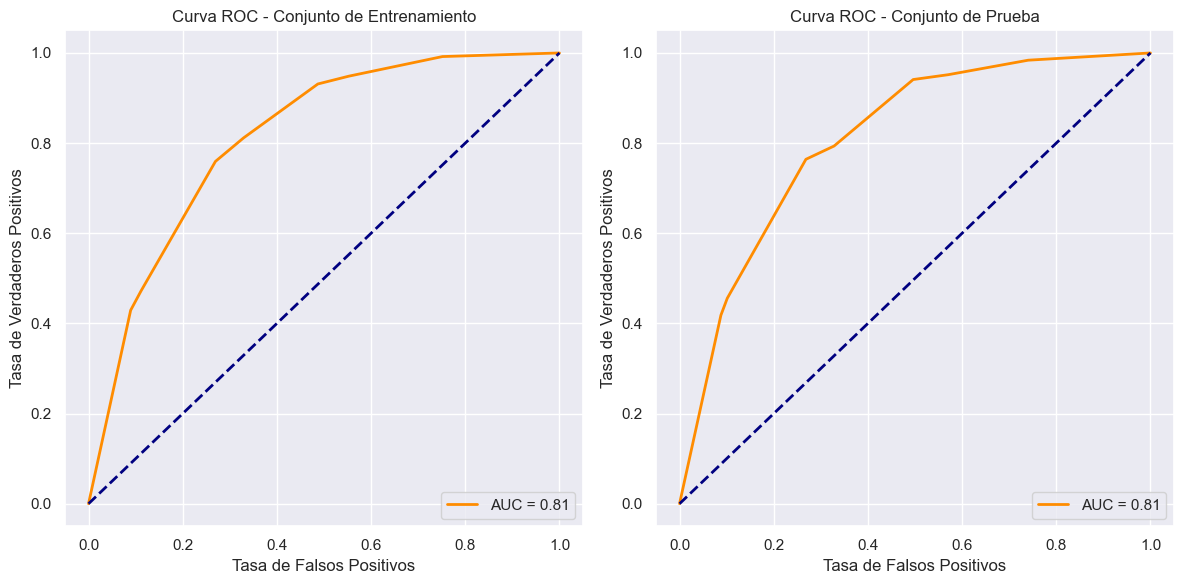

In [80]:
from sklearn.metrics import roc_auc_score

y_probs_train = dt_classifier.predict_proba(train_data[features])[:, 1]
y_probs_test = dt_classifier.predict_proba(test_data[features])[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales para ambos conjuntos
fpr_train, tpr_train, thresholds_train = roc_curve(train_data[target], y_probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(test_data[target], y_probs_test)

# Calcular el área bajo la curva ROC (AUC) para ambos conjuntos
roc_auc_train = roc_auc_score(train_data[target], y_probs_train)
roc_auc_test = roc_auc_score(test_data[target], y_probs_test)

# Graficar las curvas ROC para ambos conjuntos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Conjunto de Entrenamiento')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Conjunto de Prueba')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


## KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Seleccionar características y variable objetivo
features = ['MonthlyCharges', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 'OnlineBackup', 'SeniorCitizen']
target = 'Churn'

# Dividir el conjunto de datos en entrenamiento y prueba
X_train = df1[df1['TRAIN'] == 0][features]
y_train = df1[df1['TRAIN'] == 0][target]

X_test = df1[df1['TRAIN'] == 1][features]
y_test = df1[df1['TRAIN'] == 1][target]

# Inicializar el clasificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=52,metric = 'euclidean')

# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

# Predicciones
y_pred_train = knn_classifier.predict(X_train)# Tengo los  1 y o que predice
y_pred_test = knn_classifier.predict(X_test)# Tengo los  1 y o que predice
y_pred_prob_train =  knn_classifier.predict_proba(X_train)[:,1]# TEngo
y_pred_prob_test = knn_classifier.predict_proba(X_test)[:,1]

# Realizar predicciones en el conjunto de prueba
predictions = knn_classifier.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy del modelo k-NN: {accuracy * 100:.2f}%')




Accuracy del modelo k-NN: 78.56%


Text(0.5, 1.0, 'Distribución Estimaciones MODELO 3 TEST')

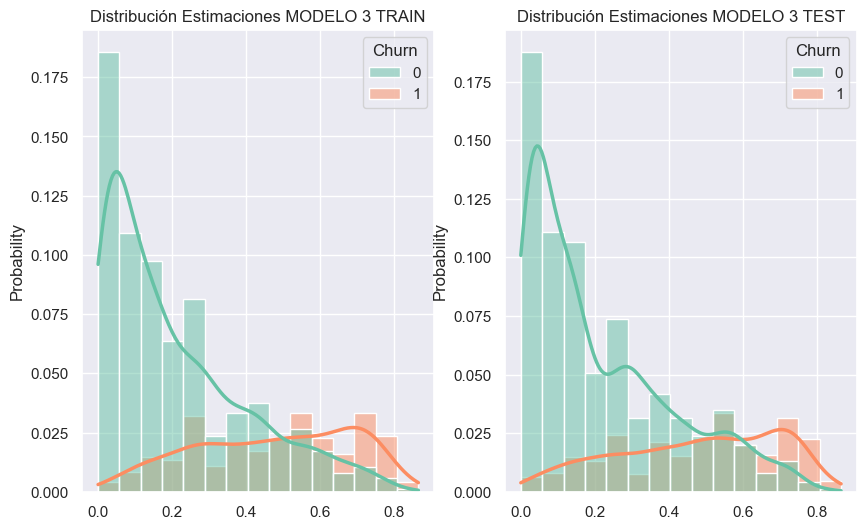

In [82]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 3 TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones MODELO 3 TEST')

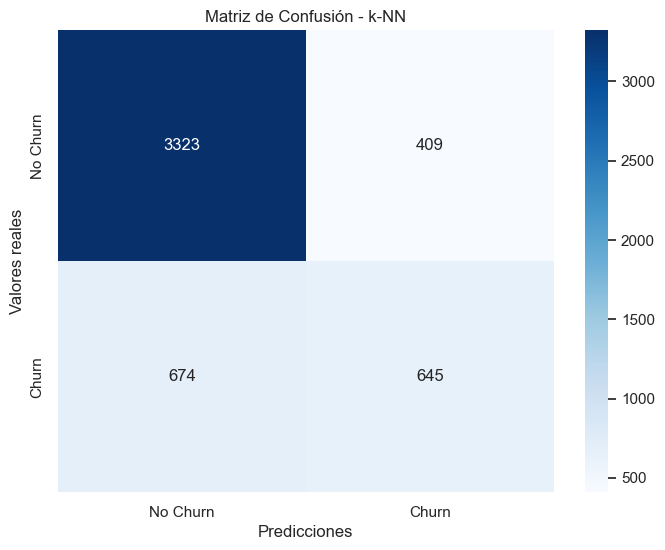


Matriz de Confusión (Tabla):
          No Churn  Churn
No Churn      3323    409
Churn          674    645


In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión - k-NN')
plt.show()

# Crear un DataFrame de pandas para representar la matriz de confusión
confusion_df = pd.DataFrame(conf_matrix, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

# Visualizar el DataFrame
print("\nMatriz de Confusión (Tabla):")
print(confusion_df)


Verdaderos Negativos (TN): 3047 clientes fueron correctamente clasificados como "No Churn".

Falsos Positivos (FP): 553 clientes fueron incorrectamente clasificados como "Churn" (falsas alarmas).

Churn (Abandono):

Falsos Negativos (FN): 642 clientes fueron incorrectamente clasificados como "No Churn" (omisiones).

Verdaderos Positivos (TP): 695 clientes fueron correctamente clasificados como "Churn".

Estos valores se pueden interpretar de la siguiente manera:

Precision (Precisión): De los clientes que el modelo predijo como "Churn", el 55.7% realmente abandonaron el servicio.

Recall (Recuperación o Sensibilidad): De todos los clientes que realmente abandonaron el servicio, el modelo identificó 

correctamente al 52.0%.

Exactitud (Accuracy): La exactitud general del modelo es la proporción de predicciones correctas, que en este caso es 

aproximadamente el 78.3%.

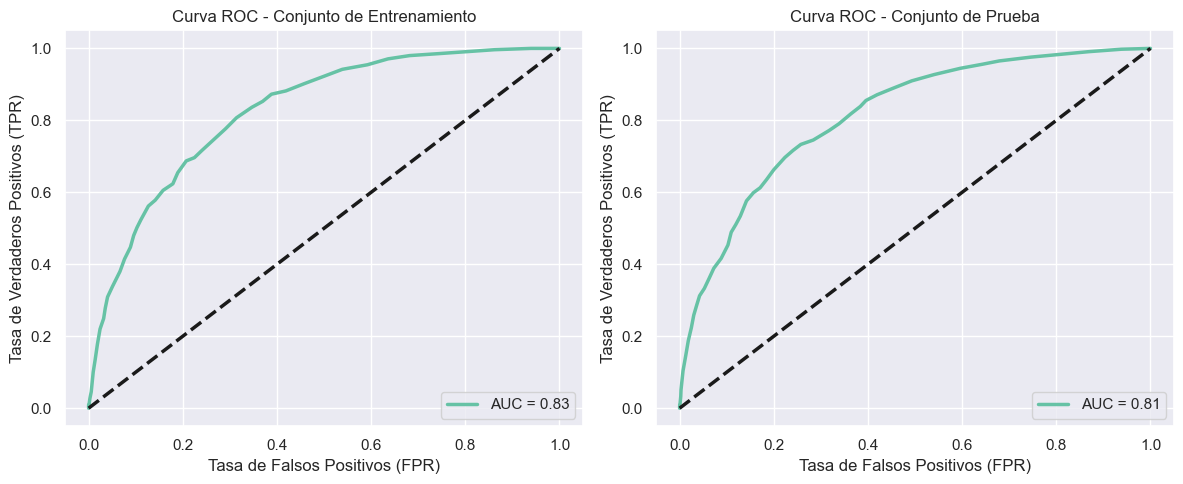

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular las probabilidades de predicción en los conjuntos de entrenamiento y prueba
y_prob_train = knn_classifier.predict_proba(X_train)[:, 1]
y_prob_test = knn_classifier.predict_proba(X_test)[:, 1]

# Calcular las curvas ROC y AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)

roc_auc_train = roc_auc_score(y_train, y_prob_train)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# Visualizar las curvas ROC y AUC en dos gráficos
plt.figure(figsize=(12, 5))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Conjunto de Entrenamiento')
plt.legend(loc='lower right')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Conjunto de Prueba')
plt.legend(loc='lower right')

# Ajustar diseño y mostrar los gráficos
plt.tight_layout()
plt.show()








## SMV


Métricas del Modelo SVM:
Exactitud: 0.80
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.70      0.42      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

Matriz de Confusión:
[[971  65]
 [218 155]]


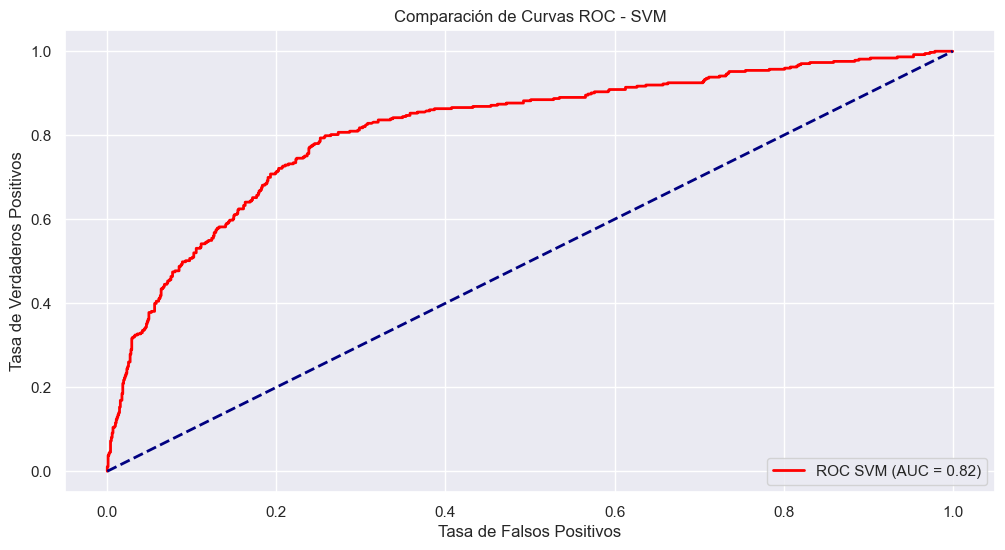

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Modelo SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(train_data[features], train_data[target])
svm_predictions = svm_model.predict(test_data[features])
svm_probs = svm_model.predict_proba(test_data[features])[:, 1]


# Comparar métricas para SVM
print("\nMétricas del Modelo SVM:")
print(f"Exactitud: {accuracy_score(test_data[target], svm_predictions):.2f}")
print("Reporte de Clasificación:")
print(classification_report(test_data[target], svm_predictions))
print("Matriz de Confusión:")
print(confusion_matrix(test_data[target], svm_predictions))

# Comparar curvas ROC para SVM
plt.figure(figsize=(12, 6))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(test_data[target], svm_probs)
roc_auc_svm = roc_auc_score(test_data[target], svm_probs)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC SVM (AUC = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC - SVM')
plt.legend(loc='lower right')

plt.show()


Matriz de Confusión - SVM:
          No Churn  Churn
No Churn       971     65
Churn          218    155


Text(67.25, 0.5, 'Valor Real')

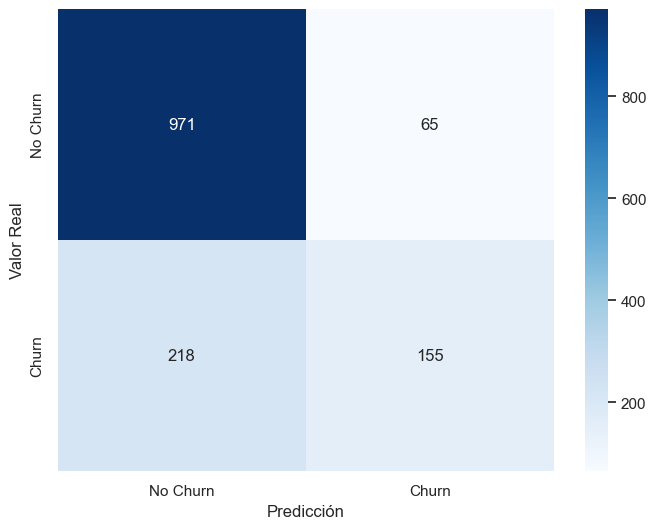

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la matriz de confusión para SVM
conf_matrix_svm = confusion_matrix(test_data[target], svm_predictions)

# Crear un DataFrame de pandas para representar la matriz de confusión
confusion_df_svm = pd.DataFrame(conf_matrix_svm, index=['No Churn', 'Churn'], columns=['No Churn', 'Churn'])

# Visualizar el DataFrame
print("Matriz de Confusión - SVM:")
print(confusion_df_svm)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')


Verdaderos Positivos (TP): 155 clientes fueron correctamente clasificados como "Churn" por el modelo SVM.

Falsos Positivos (FP): 65 clientes fueron incorrectamente clasificados como "Churn" cuando en realidad no lo hicieron.

Verdaderos Negativos (TN): 971 clientes fueron correctamente clasificados como "No Churn" por el modelo SVM.

Falsos Negativos (FN): 218 clientes fueron incorrectamente clasificados como "No Churn" cuando en realidad sí hicieron "Churn".

Estas métricas nos permiten evaluar el rendimiento del modelo SVM en la clasificación de clientes entre "Churn" y "No Churn". Aquí hay algunas conclusiones adicionales:

La tasa de precisión (accuracy) se puede calcular como (TP + TN) / Total, lo que indica la proporción de predicciones correctas en general.

La precisión (precision) se calcula como TP / (TP + FP), lo que mide la proporción de predicciones positivas que fueron correctas.

El recall (sensibilidad) se calcula como TP / (TP + FN), lo que mide la proporción de casos positivos reales que fueron identificados correctamente.

El F1-score es una métrica que combina precisión y recall, y se calcula como 2 * (precision * recall) / (precision + recall).

## COMPARATIVO DE MODELOS DE REGRESION LOGISTICA , ARBOL DE DECISION, SVM Y KNN

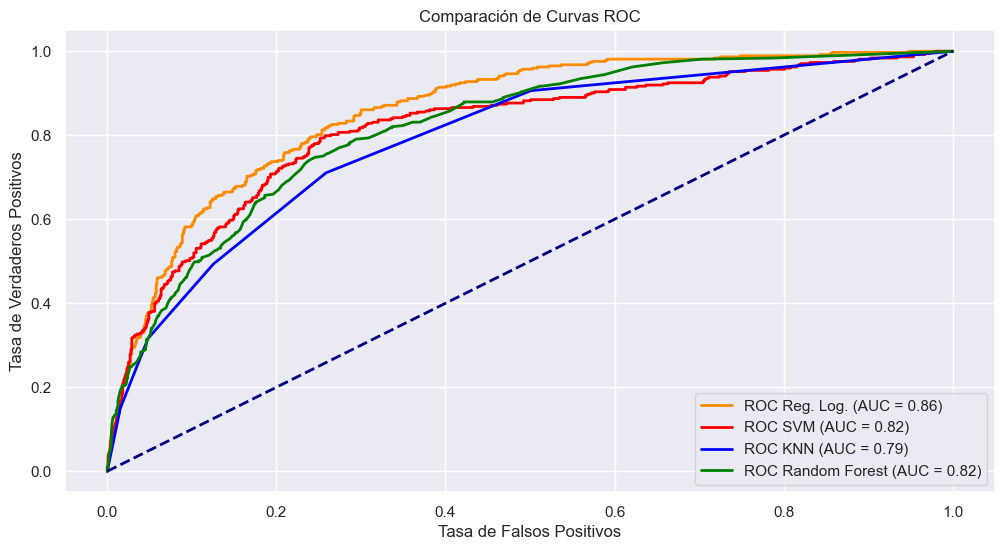

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Crear y entrenar modelos
# (Asegúrate de tener importadas tus bibliotecas y definidos tus conjuntos de entrenamiento y prueba)

# Regresión Logística
reg_log_model = LogisticRegression(random_state=42)
reg_log_model.fit(train_data[features], train_data[target])
reg_log_predictions = reg_log_model.predict(test_data[features])
reg_log_probs = reg_log_model.predict_proba(test_data[features])[:, 1]

# Modelo SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(train_data[features], train_data[target])
svm_predictions = svm_model.predict(test_data[features])
svm_probs = svm_model.predict_proba(test_data[features])[:, 1]

# Modelo KNN
knn_model = KNeighborsClassifier()
knn_model.fit(train_data[features], train_data[target])
knn_predictions = knn_model.predict(test_data[features])
knn_probs = knn_model.predict_proba(test_data[features])[:, 1]

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_data[features], train_data[target])
rf_predictions = rf_model.predict(test_data[features])
rf_probs = rf_model.predict_proba(test_data[features])[:, 1]

# Comparar métricas
# (Tus métricas y matrices de confusión aquí...)

# Comparar curvas ROC
plt.figure(figsize=(12, 6))

# Regresión Logística
fpr_reg_log, tpr_reg_log, _ = roc_curve(test_data[target], reg_log_probs)
roc_auc_reg_log = roc_auc_score(test_data[target], reg_log_probs)
plt.plot(fpr_reg_log, tpr_reg_log, color='darkorange', lw=2, label=f'ROC Reg. Log. (AUC = {roc_auc_reg_log:.2f})')

# SVM
fpr_svm, tpr_svm, _ = roc_curve(test_data[target], svm_probs)
roc_auc_svm = roc_auc_score(test_data[target], svm_probs)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC SVM (AUC = {roc_auc_svm:.2f})')

# KNN
fpr_knn, tpr_knn, _ = roc_curve(test_data[target], knn_probs)
roc_auc_knn = roc_auc_score(test_data[target], knn_probs)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC KNN (AUC = {roc_auc_knn:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(test_data[target], rf_probs)
roc_auc_rf = roc_auc_score(test_data[target], rf_probs)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')

plt.show()



Conclusión General:
La Regresión Logística muestra un rendimiento superior en términos de exactitud, precision, recall y F1-score en comparación con el Árbol de Decisión, SVM y KNN.
La Regresión Logística tiene un mejor equilibrio entre precision y recall para ambas clases.
Recomendación: Utilizar el modelo de Regresión Logística para predicciones futuras, ya que ofrece un rendimiento más robusto en este contexto específico. Considerar la interpretación del Árbol de Decisión para obtener insights adicionales sobre las características que influyen en la decisión de Churn, pero teniendo en cuenta su menor rendimiento.